In [95]:
import pandas as pd
import os
import re

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']
mode_list = ['기존', '제안']

node_dict = {
    '고밀도': {
        '고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
    },
    '중밀도': {
        '고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
    },
    '저밀도': {
        '고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
    }
}


data = []

for density in density_list:
    for speed in speed_list:
        for mode in mode_list:
            base_path = f"C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/{density}/{speed}/{mode}/"
            
            nodes = node_dict[density][speed]

            for node_id in nodes:
                file_path = os.path.join(base_path, str(node_id), "aodv_routing_log.csv")

                print(f"로딩 중: {file_path}")

                if not os.path.exists(file_path):
                    print(f"파일 없음: {file_path}")
                    continue

                try:
                    df = pd.read_csv(file_path, nrows=500)
                except Exception as e:
                    print(f"파일 로딩 실패: {file_path}, 에러: {e}")
                    continue

                def extract_node(x):
                    match = re.search(r'\[(\d+)\]', str(x))
                    return int(match.group(1)) if match else -1

                if 'Node' in df.columns:
                    df['Node'] = df['Node'].apply(extract_node)

                if 'New_LifeTime' in df.columns and 'Previous_LifeTime' in df.columns:
                    df['LifeTime_Change'] = df['New_LifeTime'] - df['Previous_LifeTime']
                else:
                    print(f"LifeTime 컬럼 없음: {file_path}")
                    continue

                for row in df.itertuples(index=False):
                    data.append([density, speed, mode, node_id, row.New_LifeTime, row.LifeTime_Change])

df_result = pd.DataFrame(data, columns=['Density', 'Speed', 'Method', 'Node', 'LifeTime', 'LifeTime_Change'])

print("데이터 로딩 완료")


로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/0\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/4\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/6\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/7\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/9\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/10\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/11\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/17\aodv_routing_log.csv
로딩 중: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/고밀도/고속/기존/19\aodv_rout

In [11]:
df_result['Method']

0        기존
1        기존
2        기존
3        기존
4        기존
         ..
18495    기존
18496    기존
18497    기존
18498    기존
18499    기존
Name: Method, Length: 18500, dtype: object

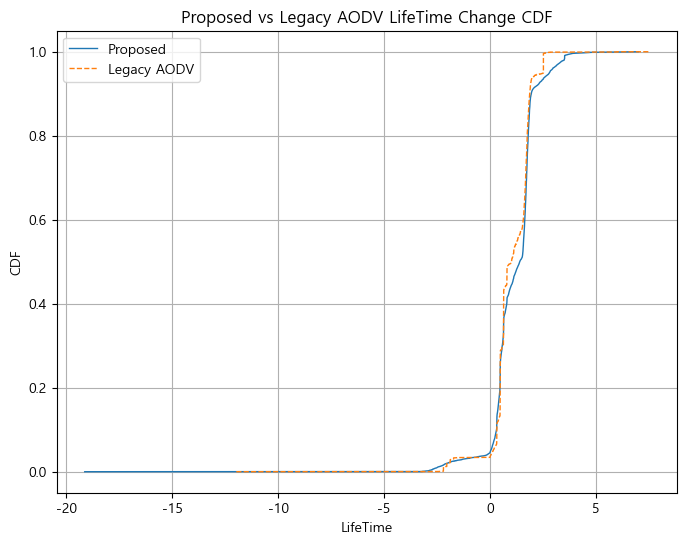

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_proposed = df_result[df_result['Method'] == '제안']
df_baseline = df_result[df_result['Method'] == '기존']

life_proposed = df_proposed['LifeTime_Change'].values
life_baseline = df_baseline['LifeTime_Change'].values

def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

x_proposed, cdf_proposed = compute_cdf(life_proposed)
x_baseline, cdf_baseline = compute_cdf(life_baseline)

plt.figure(figsize=(8, 6))
plt.plot(x_proposed, cdf_proposed, label="Proposed", linestyle='-', linewidth=1)
plt.plot(x_baseline, cdf_baseline, label="Legacy AODV", linestyle='--', linewidth=1)
plt.xlabel("LifeTime")
plt.ylabel("CDF")
plt.title("Proposed vs Legacy AODV LifeTime Change CDF")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import os
from collections import defaultdict

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']

node_dict = {
    '고밀도': {
        '고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
    },
    '중밀도': {
        '고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
    },
    '저밀도': {
        '고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
    }
}

failure_data = {'기존': [], '제안': []}

failed_node_counts = {
    '기존': defaultdict(lambda: defaultdict(int)),
    '제안': defaultdict(lambda: defaultdict(int)),
}

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"

for density in density_list:
    for speed in speed_list:
        for mode in ['기존', '제안']:
            nodes = node_dict[density][speed]

            for node_id in nodes:
                node_path = os.path.join(base_dir, density, speed, mode, str(node_id))

                transmit_file = os.path.join(node_path, "transmitCount.txt")
                failed_file = os.path.join(node_path, "failedCount.txt")
                linkbreak_file = os.path.join(node_path, "LinkBreakCount.txt")
                rerr_file = os.path.join(node_path, "rerr.txt")
                collision_file = os.path.join(node_path, "collision_log.txt")

                if not all(os.path.exists(f) for f in [transmit_file, failed_file, linkbreak_file, rerr_file, collision_file]):
                    print(f"파일 없음: {transmit_file}, {failed_file}, {linkbreak_file}, {rerr_file}, 또는 {collision_file}")
                    continue

                try:
                    with open(transmit_file, 'r', encoding='utf-8') as f:
                        transmit_count = sum(1 for _, _ in zip(f, range(100000)))

                    failed_count = 0
                    with open(failed_file, 'r', encoding='utf-8') as f:
                        for line in f:
                            line = line.strip()
                            if not line:
                                continue
                            if "node[" in line or "rsu[" in line:
                                failed_node = line.split(":")[0].strip()
                                failed_node_counts[mode][(density, speed, node_id)][failed_node] += 1
                                failed_count += 1

                    with open(linkbreak_file, 'r', encoding='utf-8') as f:
                        linkbreak_count = sum(1 for _, _ in zip(f, range(100000)))

                    with open(rerr_file, 'r', encoding='utf-8') as f:
                        rerr_count = sum(1 for _, _ in zip(f, range(100000)))

                    with open(collision_file, 'r', encoding='utf-8') as f:
                        collision_count = sum(1 for _, _ in zip(f, range(100000)))

                    if transmit_count == 0:
                        print(f"파일이 비어 있음: {transmit_file}")
                        continue

                    failure_rate = (failed_count / transmit_count) * 100

                    failure_data[mode].append([
                        density, speed, node_id,
                        transmit_count, failed_count, failure_rate,
                        linkbreak_count, rerr_count, collision_count
                    ])

                    #print(f"처리 완료: {node_path}, 실패율: {failure_rate:.2f}%, LinkBreak: {linkbreak_count}, RERR: {rerr_count}, Collision: {collision_count}")

                except Exception as e:
                    print(f"파일 처리 실패: {node_path}, 에러: {e}")
                    continue

df_existing = pd.DataFrame(
    failure_data['기존'],
    columns=['Density', 'Speed', 'Node', 'Transmit_기존', 'Failed_기존', 'FailureRate_기존', 'LinkBreak_기존', 'RERR_기존', 'Collision_기존']
)
df_proposed = pd.DataFrame(
    failure_data['제안'],
    columns=['Density', 'Speed', 'Node', 'Transmit_제안', 'Failed_제안', 'FailureRate_제안', 'LinkBreak_제안', 'RERR_제안', 'Collision_제안']
)

df_comparison = pd.merge(df_existing, df_proposed, on=['Density', 'Speed', 'Node'], how='outer')
df_comparison.fillna(0, inplace=True)

output_path = "failure_analysis_comparison.csv"
df_comparison.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"CSV 저장 완료: {output_path}")

failed_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_failures in failed_node_counts[mode].items():
        for failed_node, count in node_failures.items():
            failed_summary.append([mode, density, speed, node_id, failed_node, count])

df_failed_detail = pd.DataFrame(
    failed_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Failed_Node', 'Failure_Count']
)

df_failed_detail.to_csv("failed_node_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv")


파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\transmitCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\failedCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\LinkBreakCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\rerr.txt, 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\collision_log.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\transmitCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\failedCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\LinkBreakCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\rerr.txt, 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime

In [43]:
import pandas as pd
import os
from collections import defaultdict

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']

node_dict = {
    '고밀도': {
        '고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
        '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
    },
    '중밀도': {
        '고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
        '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
    },
    '저밀도': {
        '고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
        '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
    }
}

failed_node_counts = {
    '기존': defaultdict(lambda: defaultdict(int)),
    '제안': defaultdict(lambda: defaultdict(int)),
}

transmit_counts = defaultdict(int)

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"

for density in density_list:
    for speed in speed_list:
        for mode in ['기존', '제안']:
            nodes = node_dict[density][speed]
            for node_id in nodes:
                node_path = os.path.join(base_dir, density, speed, mode, str(node_id))

                transmit_file = os.path.join(node_path, "transmitCount.txt")
                failed_file = os.path.join(node_path, "failedCount.txt")

                if not all(os.path.exists(f) for f in [transmit_file, failed_file]):
                    print(f"파일 없음: {transmit_file} 또는 {failed_file}")
                    continue

                with open(transmit_file, 'r', encoding='utf-8') as f:
                    transmit_count = sum(1 for _, _ in zip(f, range(100000)))
                    transmit_counts[(mode, density, speed, node_id)] = transmit_count

                with open(failed_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        if "node[" in line or "rsu[" in line:
                            failed_node = line.split(":")[0].strip()
                            failed_node_counts[mode][(density, speed, node_id)][failed_node] += 1

failed_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_failures in failed_node_counts[mode].items():
        key = (mode, density, speed, node_id)
        transmit_count = transmit_counts.get(key, 0)

        for failed_node, count in node_failures.items():
            failure_rate = (count / transmit_count) * 100 if transmit_count > 0 else 0
            failed_summary.append([
                mode, density, speed, node_id,
                failed_node, count, transmit_count, failure_rate
            ])

df_failed_detail = pd.DataFrame(
    failed_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Failed_Node', 'Failure_Count', 'Transmit_Count', 'Failure_Rate']
)

df_failed_detail.to_csv("failed_node_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv")


노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv


In [ ]:
import pandas as pd
import os
from collections import defaultdict

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']

node_dict = {
    '고밀도': {'고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]},
    '중밀도': {'고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]},
    '저밀도': {'고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26]}
}

failed_node_counts = {'기존': defaultdict(lambda: defaultdict(int)), '제안': defaultdict(lambda: defaultdict(int))}
collision_node_counts = {'기존': defaultdict(lambda: defaultdict(int)), '제안': defaultdict(lambda: defaultdict(int))}

transmit_counts = defaultdict(int)

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"

for density in density_list:
    for speed in speed_list:
        for mode in ['기존', '제안']:
            nodes = node_dict[density][speed]
            for node_id in nodes:
                node_path = os.path.join(base_dir, density, speed, mode, str(node_id))

                transmit_file = os.path.join(node_path, "transmitCount.txt")
                failed_file = os.path.join(node_path, "failedCount.txt")
                collision_file = os.path.join(node_path, "collision_log.txt")

                if not all(os.path.exists(f) for f in [transmit_file, failed_file, collision_file]):
                    print(f"파일 없음: {transmit_file}, {failed_file}, 또는 {collision_file}")
                    continue

                with open(transmit_file, 'r', encoding='utf-8') as f:
                    transmit_count = sum(1 for _, _ in zip(f, range(100000)))
                    transmit_counts[(mode, density, speed, node_id)] = transmit_count

                with open(failed_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        if "node[" in line or "rsu[" in line:
                            failed_node = line.split(":")[0].strip()
                            failed_node_counts[mode][(density, speed, node_id)][failed_node] += 1

                with open(collision_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        if "node[" in line or "rsu[" in line:
                            collided_node = line.split(":")[0].strip()
                            collision_node_counts[mode][(density, speed, node_id)][collided_node] += 1

failed_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_failures in failed_node_counts[mode].items():
        key = (mode, density, speed, node_id)
        transmit_count = transmit_counts.get(key, 0)

        for failed_node, count in node_failures.items():
            failure_rate = (count / transmit_count) * 100 if transmit_count > 0 else 0
            failed_summary.append([
                mode, density, speed, node_id,
                failed_node, count, transmit_count, failure_rate
            ])

df_failed_detail = pd.DataFrame(
    failed_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Failed_Node', 'Failure_Count', 'Transmit_Count', 'Failure_Rate']
)
df_failed_detail.to_csv("failed_node_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv")

collision_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_collisions in collision_node_counts[mode].items():
        key = (mode, density, speed, node_id)
        transmit_count = transmit_counts.get(key, 0)

        for collided_node, count in node_collisions.items():
            collision_rate = (count / transmit_count) * 100 if transmit_count > 0 else 0
            collision_summary.append([
                mode, density, speed, node_id,
                collided_node, count, transmit_count, collision_rate
            ])

df_collision_detail = pd.DataFrame(
    collision_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Collided_Node', 'Collision_Count', 'Transmit_Count', 'Collision_Rate']
)
df_collision_detail.to_csv("collision_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 충돌 세부 CSV 저장 완료: collision_detail.csv")


노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv
노드별 충돌 세부 CSV 저장 완료: collision_detail.csv


In [ ]:
import pandas as pd
import os
from collections import defaultdict

density_list = ['고밀도', '중밀도', '저밀도']
speed_list = ['고속', '중속', '저속']

node_dict = {
    '고밀도': {'고속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '중속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20],
              '저속': [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]},
    '중밀도': {'고속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '중속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29],
              '저속': [6, 7, 17, 18, 21, 22, 24, 26, 27, 29]},
    '저밀도': {'고속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '중속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26],
              '저속': [6, 7, 17, 18, 19, 21, 22, 24, 25, 26]}
}

failed_node_counts = {'기존': defaultdict(lambda: defaultdict(int)), '제안': defaultdict(lambda: defaultdict(int))}
collision_node_counts = {'기존': defaultdict(lambda: defaultdict(int)), '제안': defaultdict(lambda: defaultdict(int))}
rerr_node_counts = {'기존': defaultdict(int), '제안': defaultdict(int)}

transmit_counts = defaultdict(int)

base_dir = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/"

for density in density_list:
    for speed in speed_list:
        for mode in ['기존', '제안']:
            nodes = node_dict[density][speed]
            for node_id in nodes:
                node_path = os.path.join(base_dir, density, speed, mode, str(node_id))

                transmit_file = os.path.join(node_path, "transmitCount.txt")
                failed_file = os.path.join(node_path, "failedCount.txt")
                collision_file = os.path.join(node_path, "collision_log.txt")
                rerr_file = os.path.join(node_path, "rerr.txt")

                if not all(os.path.exists(f) for f in [transmit_file, failed_file, collision_file, rerr_file]):
                    print(f"파일 없음: {transmit_file}, {failed_file}, {collision_file}, 또는 {rerr_file}")
                    continue

                with open(transmit_file, 'r', encoding='utf-8') as f:
                    transmit_count = sum(1 for _, _ in zip(f, range(100000)))
                    transmit_counts[(mode, density, speed, node_id)] = transmit_count

                with open(failed_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        if "node[" in line or "rsu[" in line:
                            failed_node = line.split(":")[0].strip()
                            failed_node_counts[mode][(density, speed, node_id)][failed_node] += 1

                with open(collision_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        if "node[" in line or "rsu[" in line:
                            collided_node = line.split(":")[0].strip()
                            collision_node_counts[mode][(density, speed, node_id)][collided_node] += 1

                with open(rerr_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        line = line.strip()
                        if not line:
                            continue
                        rerr_node_counts[mode][(density, speed, node_id)] += 1

failed_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_failures in failed_node_counts[mode].items():
        key = (mode, density, speed, node_id)
        transmit_count = transmit_counts.get(key, 0)
        for failed_node, count in node_failures.items():
            failure_rate = (count / transmit_count) * 100 if transmit_count > 0 else 0
            failed_summary.append([
                mode, density, speed, node_id,
                failed_node, count, transmit_count, failure_rate
            ])

df_failed_detail = pd.DataFrame(
    failed_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Failed_Node', 'Failure_Count', 'Transmit_Count', 'Failure_Rate']
)
df_failed_detail.to_csv("failed_node_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 실패 세부 CSV 저장 완료: failed_node_detail.csv")

collision_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), node_collisions in collision_node_counts[mode].items():
        key = (mode, density, speed, node_id)
        transmit_count = transmit_counts.get(key, 0)
        for collided_node, count in node_collisions.items():
            collision_rate = (count / transmit_count) * 100 if transmit_count > 0 else 0
            collision_summary.append([
                mode, density, speed, node_id,
                collided_node, count, transmit_count, collision_rate
            ])

df_collision_detail = pd.DataFrame(
    collision_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'Collided_Node', 'Collision_Count', 'Transmit_Count', 'Collision_Rate']
)
df_collision_detail.to_csv("collision_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 충돌 세부 CSV 저장 완료: collision_detail.csv")

rerr_summary = []
for mode in ['기존', '제안']:
    for (density, speed, node_id), rerr_count in rerr_node_counts[mode].items():
        transmit_count = transmit_counts.get((mode, density, speed, node_id), 0)
        rerr_rate = (rerr_count / transmit_count) * 100 if transmit_count > 0 else 0
        rerr_summary.append([
            mode, density, speed, node_id,
            rerr_count, transmit_count, rerr_rate
        ])

df_rerr_detail = pd.DataFrame(
    rerr_summary,
    columns=['Mode', 'Density', 'Speed', 'Node_ID', 'RERR_Count', 'Transmit_Count', 'RERR_Rate']
)
df_rerr_detail.to_csv("rerr_detail.csv", index=False, encoding="utf-8-sig")
print("노드별 RERR 세부 CSV 저장 완료: rerr_detail.csv")


파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\transmitCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\failedCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\collision_log.txt, 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\기존\7\rerr.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\transmitCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\failedCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\collision_log.txt, 또는 C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/중밀도\저속\제안\7\rerr.txt
파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Lifetime 결과_V02/저밀도\저속\기존\7\transmitCount.txt, C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Life

C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_25572\1066876525.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['Failure_Rate'].mean().reset_index()


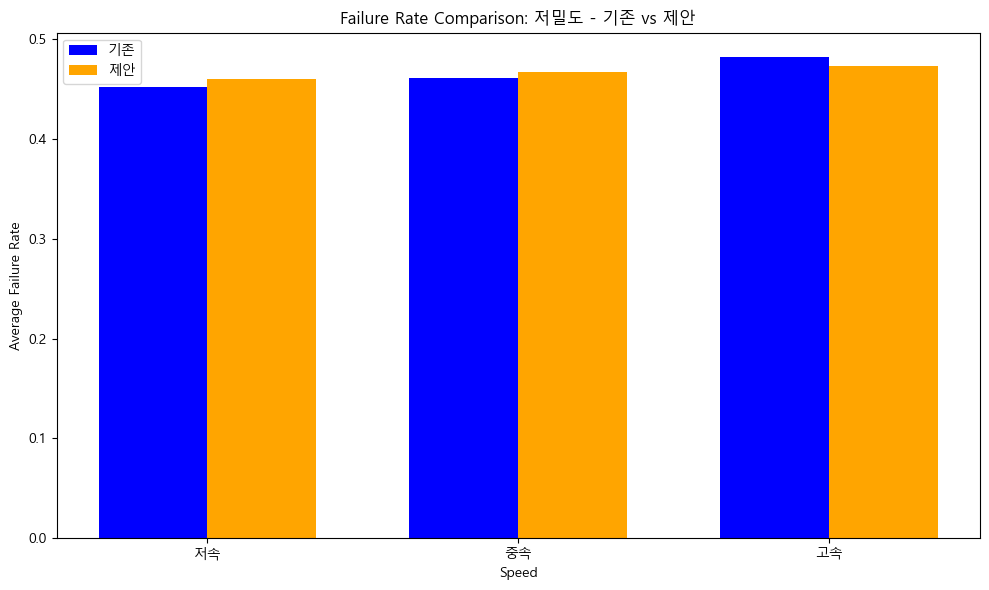

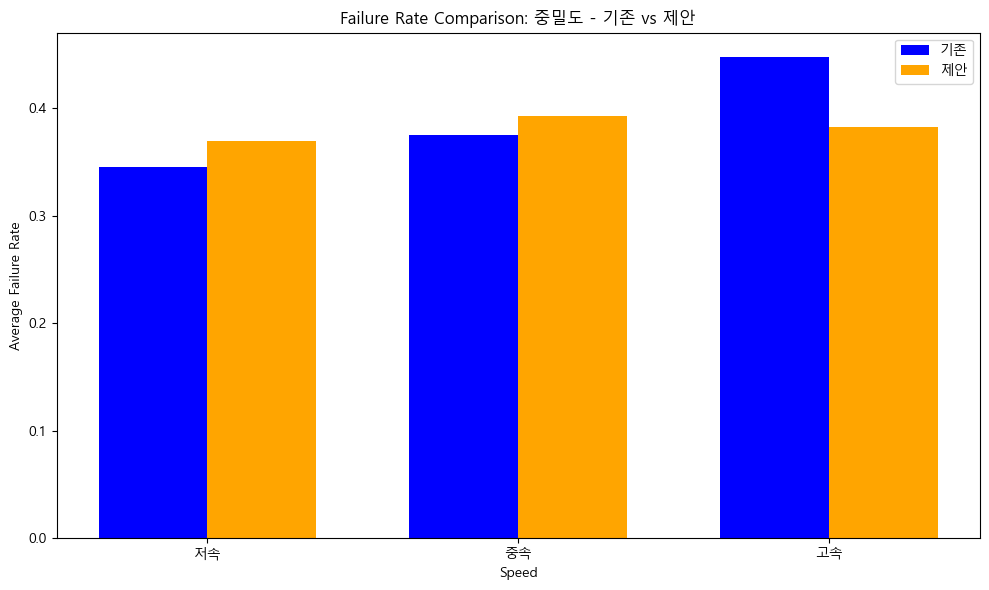

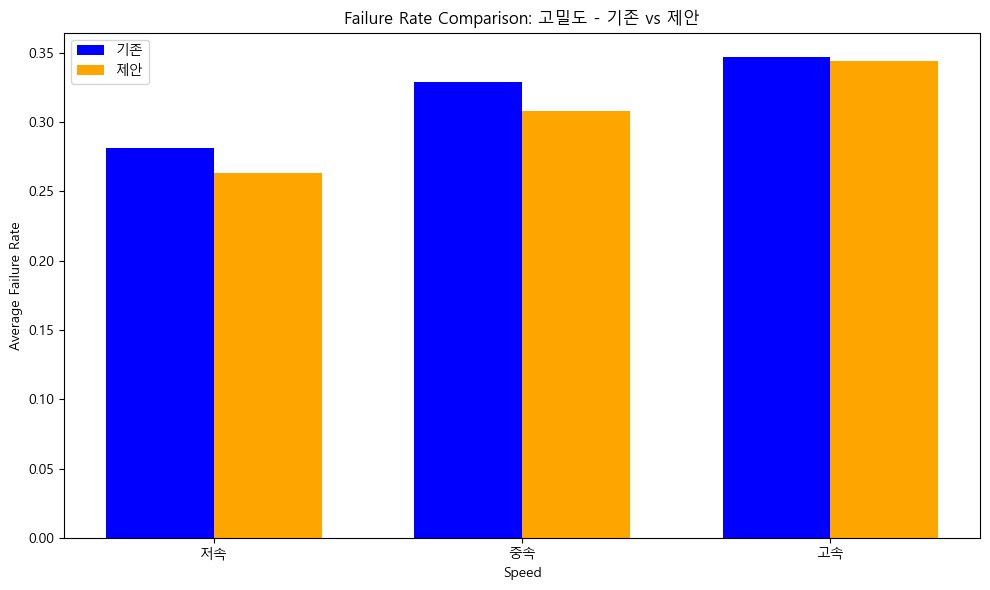

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'failed_node_detail.csv'
data = pd.read_csv(file_path)

data['Speed'] = pd.Categorical(data['Speed'], categories=['저속', '중속', '고속'], ordered=True)

environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['Failure_Rate'].mean().reset_index()

for density in ['저밀도', '중밀도', '고밀도']:
    density_data = environment_avg[environment_avg['Density'] == density]
    density_data = density_data.sort_values('Speed')

    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    positions = range(len(density_data['Speed'].unique()))

    기존_avg = density_data[density_data['Mode'] == '기존']
    제안_avg = density_data[density_data['Mode'] == '제안']

    plt.bar(positions, 기존_avg['Failure_Rate'], width=bar_width, label="기존", color='blue')
    plt.bar([p + bar_width for p in positions], 제안_avg['Failure_Rate'], width=bar_width, label="제안", color='orange')

    xticks = ['저속', '중속', '고속']
    plt.xticks([p + bar_width/2 for p in positions], xticks)

    plt.title(f'Failure Rate Comparison: {density} - 기존 vs 제안')
    plt.xlabel('Speed')
    plt.ylabel('Average Failure Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_25572\3183377329.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['RERR_Rate'].mean().reset_index()


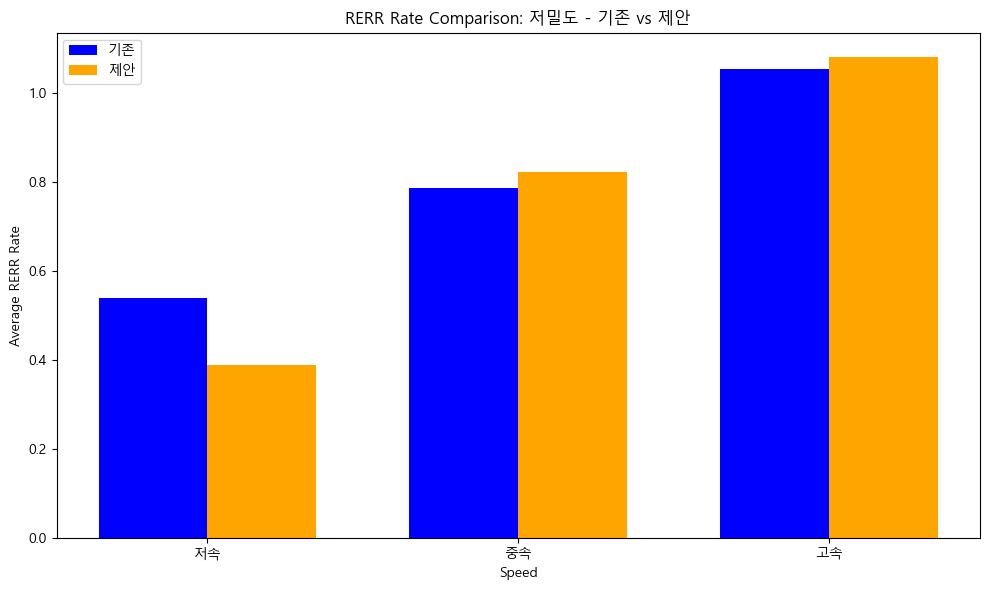

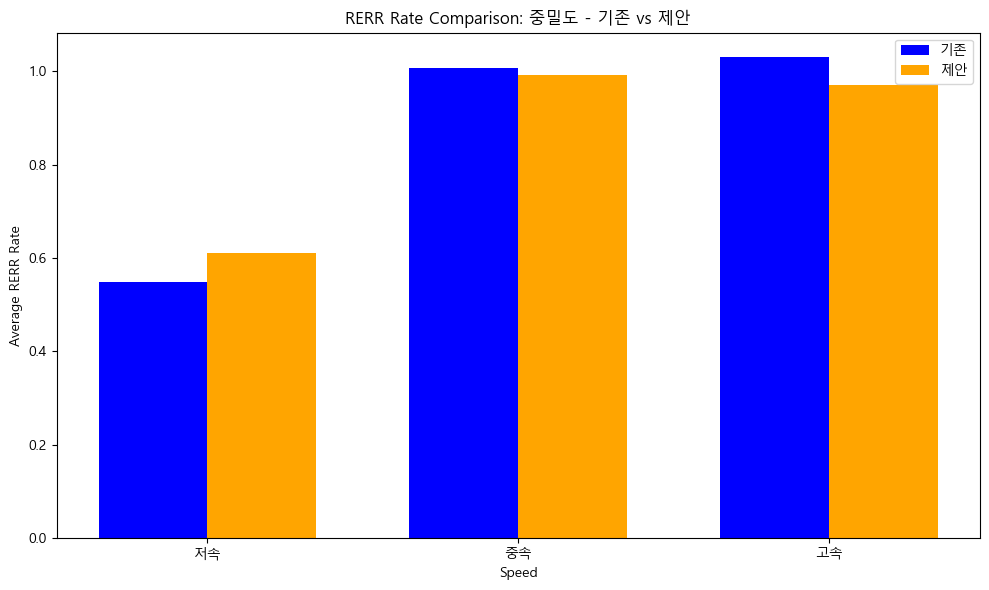

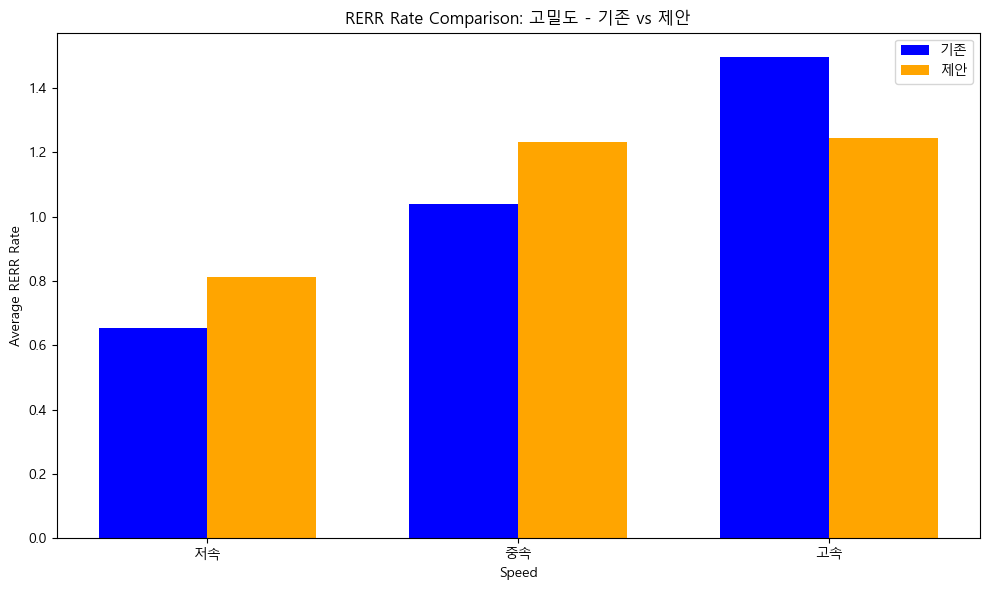

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'rerr_detail.csv'
data = pd.read_csv(file_path)

data['Speed'] = pd.Categorical(data['Speed'], categories=['저속', '중속', '고속'], ordered=True)

environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['RERR_Rate'].mean().reset_index()

for density in ['저밀도', '중밀도', '고밀도']:
    density_data = environment_avg[environment_avg['Density'] == density]
    density_data = density_data.sort_values('Speed')

    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    positions = range(len(density_data['Speed'].unique()))

    기존_avg = density_data[density_data['Mode'] == '기존']
    제안_avg = density_data[density_data['Mode'] == '제안']

    plt.bar(positions, 기존_avg['RERR_Rate'], width=bar_width, label="기존", color='blue')
    plt.bar([p + bar_width for p in positions], 제안_avg['RERR_Rate'], width=bar_width, label="제안", color='orange')

    xticks = ['저속', '중속', '고속']
    plt.xticks([p + bar_width/2 for p in positions], xticks)

    plt.title(f'RERR Rate Comparison: {density} - 기존 vs 제안')
    plt.xlabel('Speed')
    plt.ylabel('Average RERR Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_25572\1716443716.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['Collision_Rate'].mean().reset_index()


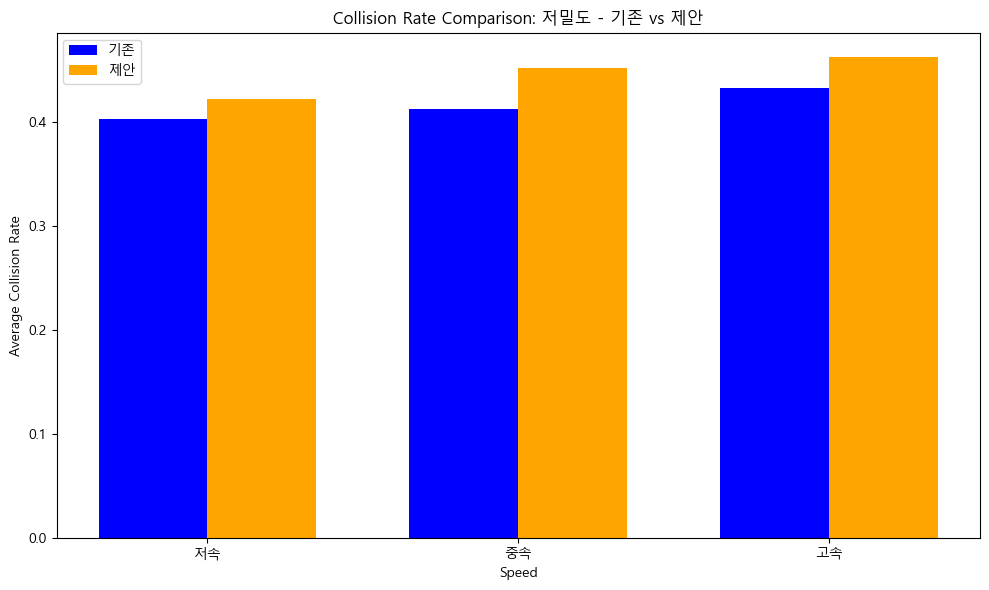

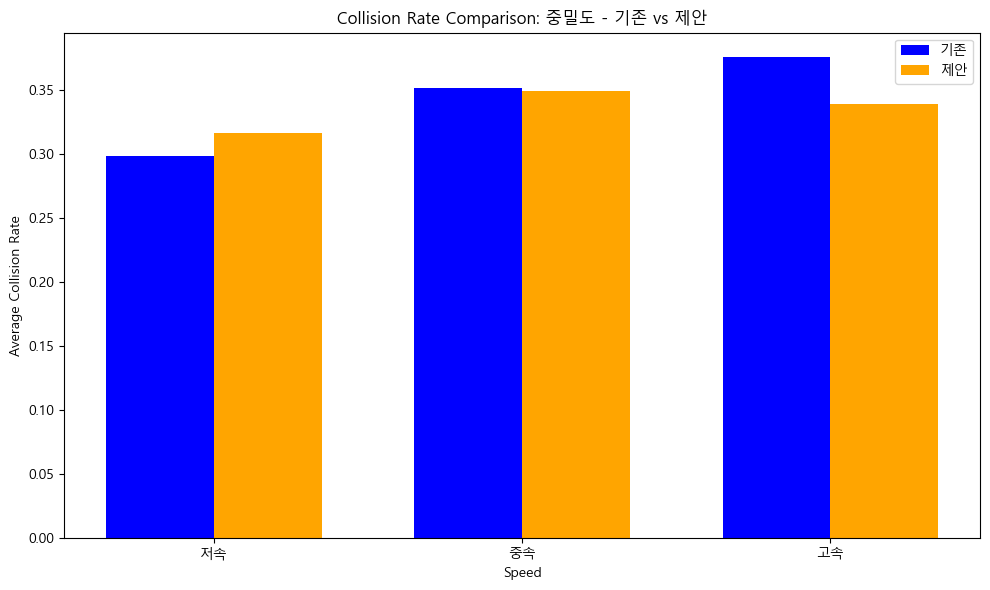

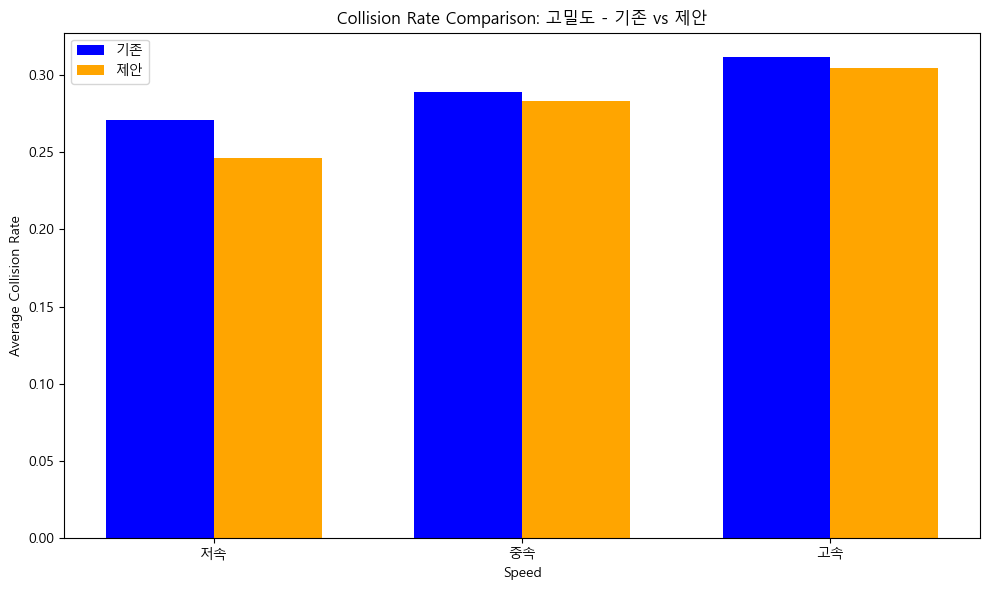

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'collision_detail.csv'
data = pd.read_csv(file_path)

data['Speed'] = pd.Categorical(data['Speed'], categories=['저속', '중속', '고속'], ordered=True)

environment_avg = data.groupby(['Mode', 'Density', 'Speed'])['Collision_Rate'].mean().reset_index()

for density in ['저밀도', '중밀도', '고밀도']:
    density_data = environment_avg[environment_avg['Density'] == density]
    density_data = density_data.sort_values('Speed')

    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    positions = range(len(density_data['Speed'].unique()))

    기존_avg = density_data[density_data['Mode'] == '기존']
    제안_avg = density_data[density_data['Mode'] == '제안']

    plt.bar(positions, 기존_avg['Collision_Rate'], width=bar_width, label="기존", color='blue')
    plt.bar([p + bar_width for p in positions], 제안_avg['Collision_Rate'], width=bar_width, label="제안", color='orange')

    xticks = ['저속', '중속', '고속']
    plt.xticks([p + bar_width/2 for p in positions], xticks)

    plt.title(f'Collision Rate Comparison: {density} - 기존 vs 제안')
    plt.xlabel('Speed')
    plt.ylabel('Average Collision Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()


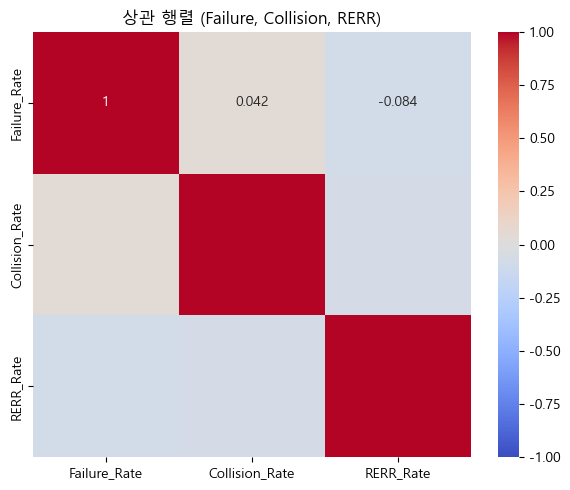

c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


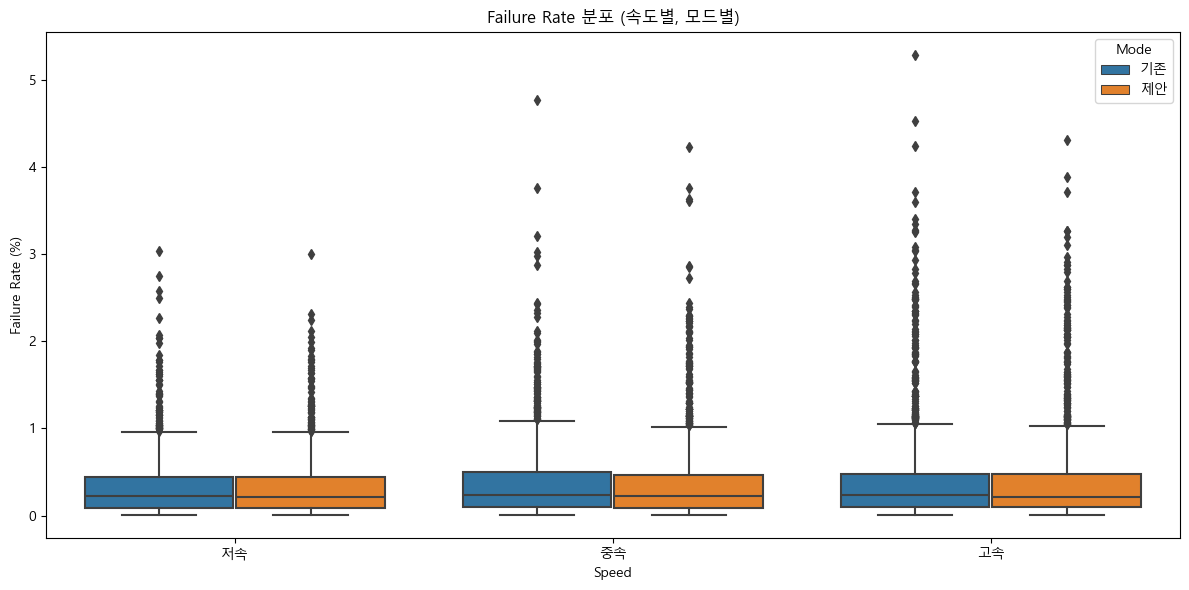

c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


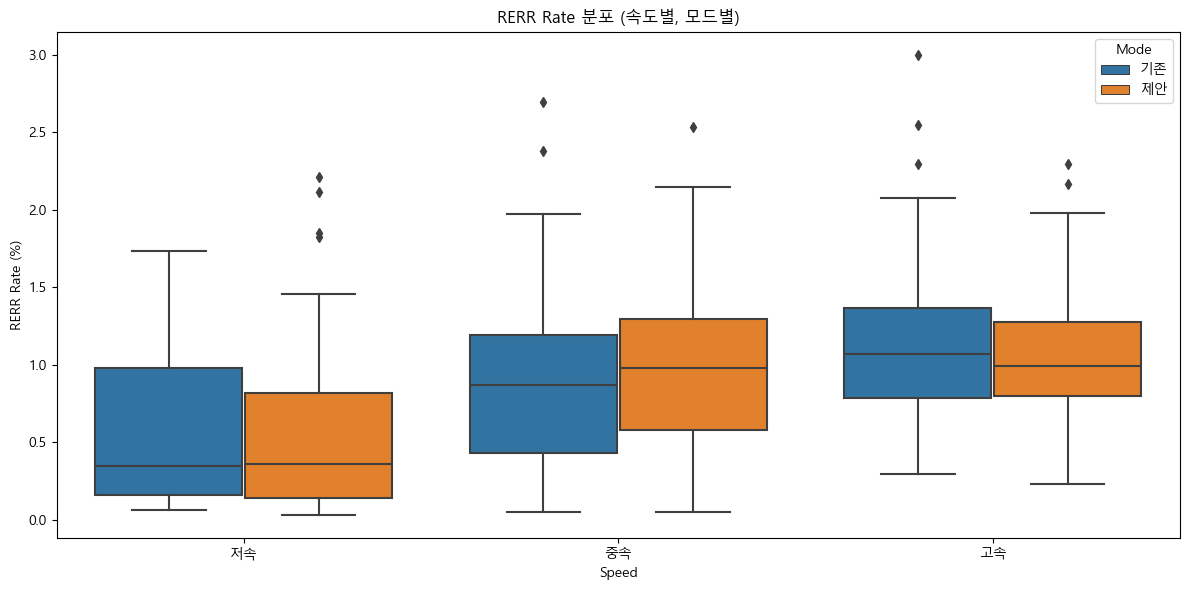

c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Conda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


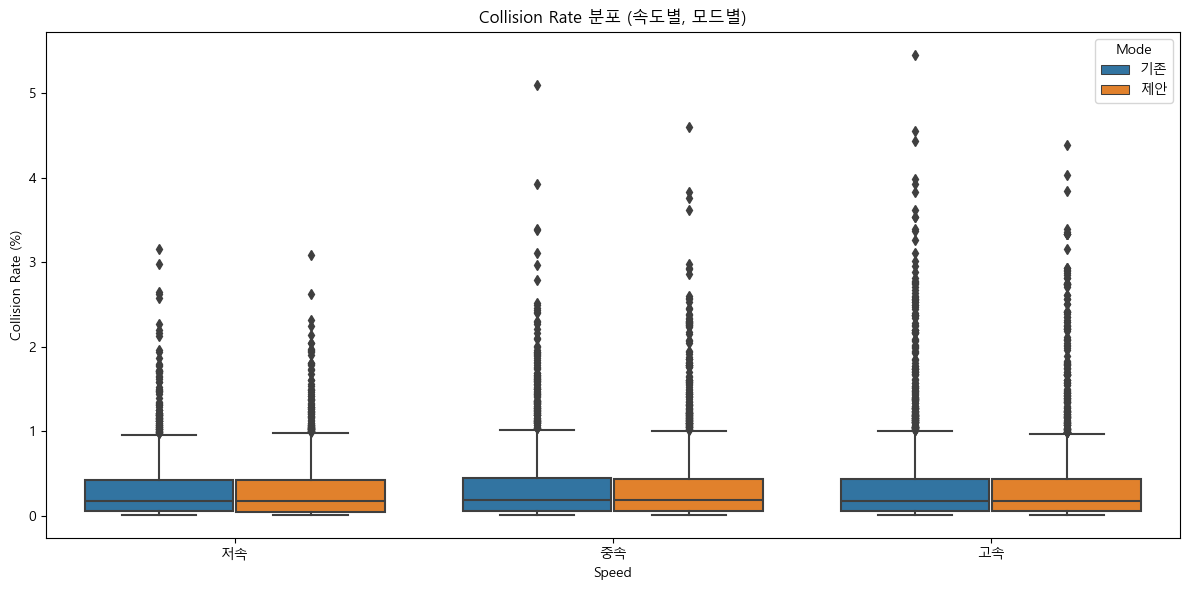

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# 데이터 로드
df_fail = pd.read_csv("failed_node_detail.csv")
df_collision = pd.read_csv("collision_detail.csv")
df_rerr = pd.read_csv("rerr_detail.csv")

# 기본 전처리
df_fail['Speed'] = pd.Categorical(df_fail['Speed'], categories=['저속', '중속', '고속'], ordered=True)
df_collision['Speed'] = pd.Categorical(df_collision['Speed'], categories=['저속', '중속', '고속'], ordered=True)
df_rerr['Speed'] = pd.Categorical(df_rerr['Speed'], categories=['저속', '중속', '고속'], ordered=True)

# 1. Failure, Collision, RERR 간 상관 분석
merged = pd.merge(df_fail, df_collision, on=['Mode', 'Density', 'Speed', 'Node_ID'], suffixes=('_Fail', '_Coll'))
merged = pd.merge(merged, df_rerr, on=['Mode', 'Density', 'Speed', 'Node_ID'])

# 필요한 컬럼만 추출
corr_data = merged[['Failure_Rate', 'Collision_Rate', 'RERR_Rate']]

# 상관계수 계산
correlation_matrix = corr_data.corr(method='pearson')

# 시각화: 상관 행렬 히트맵
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("상관 행렬 (Failure, Collision, RERR)")
plt.tight_layout()
plt.show()

# 2. 밀도, 속도, 모드 별 분산 시각화 (박스플롯)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fail, x='Speed', y='Failure_Rate', hue='Mode')
plt.title("Failure Rate 분포 (속도별, 모드별)")
plt.ylabel("Failure Rate (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rerr, x='Speed', y='RERR_Rate', hue='Mode')
plt.title("RERR Rate 분포 (속도별, 모드별)")
plt.ylabel("RERR Rate (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_collision, x='Speed', y='Collision_Rate', hue='Mode')
plt.title("Collision Rate 분포 (속도별, 모드별)")
plt.ylabel("Collision Rate (%)")
plt.tight_layout()
plt.show()


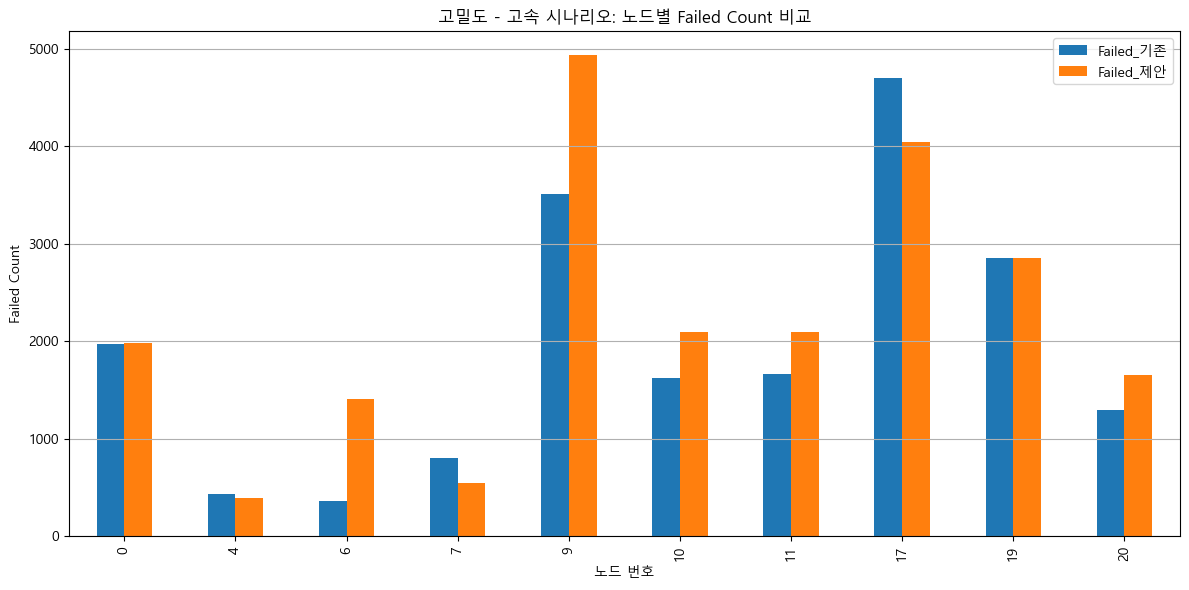

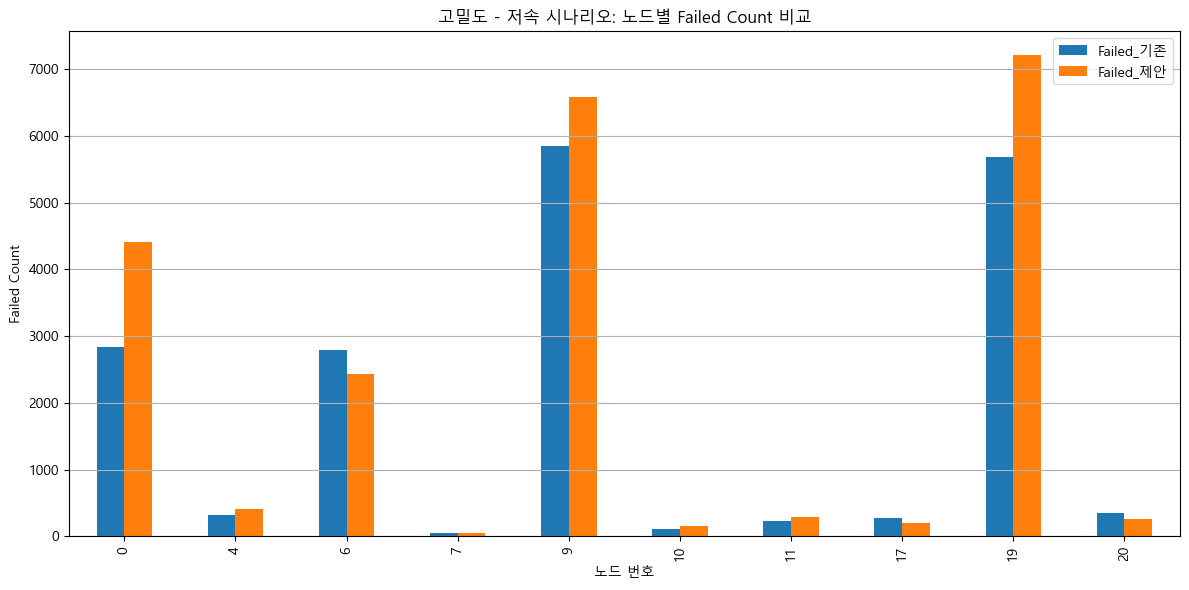

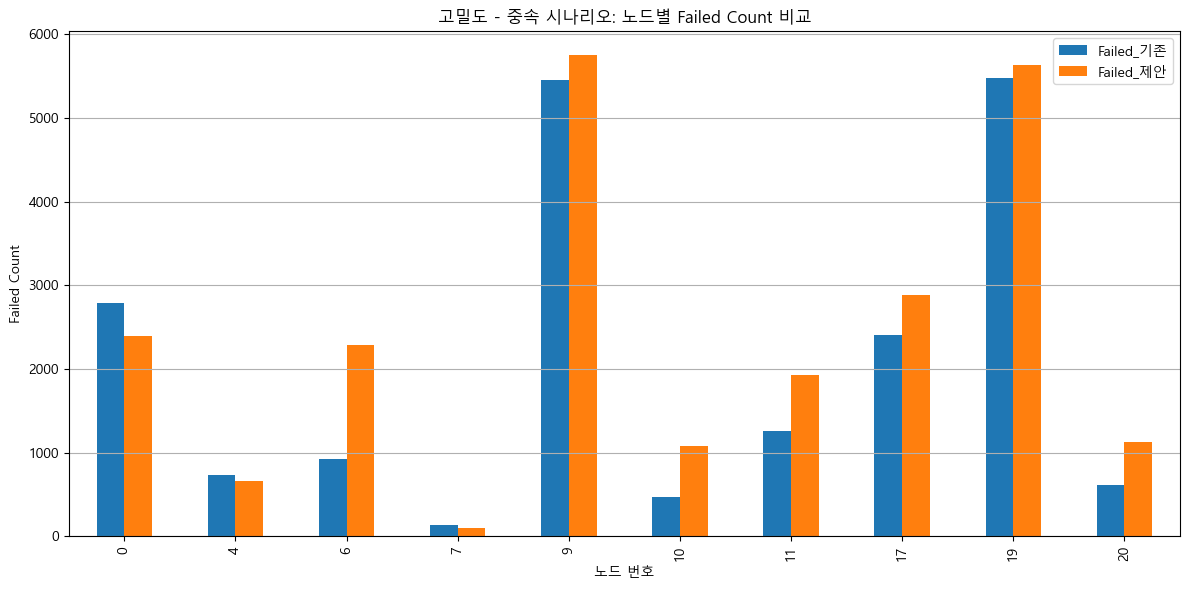

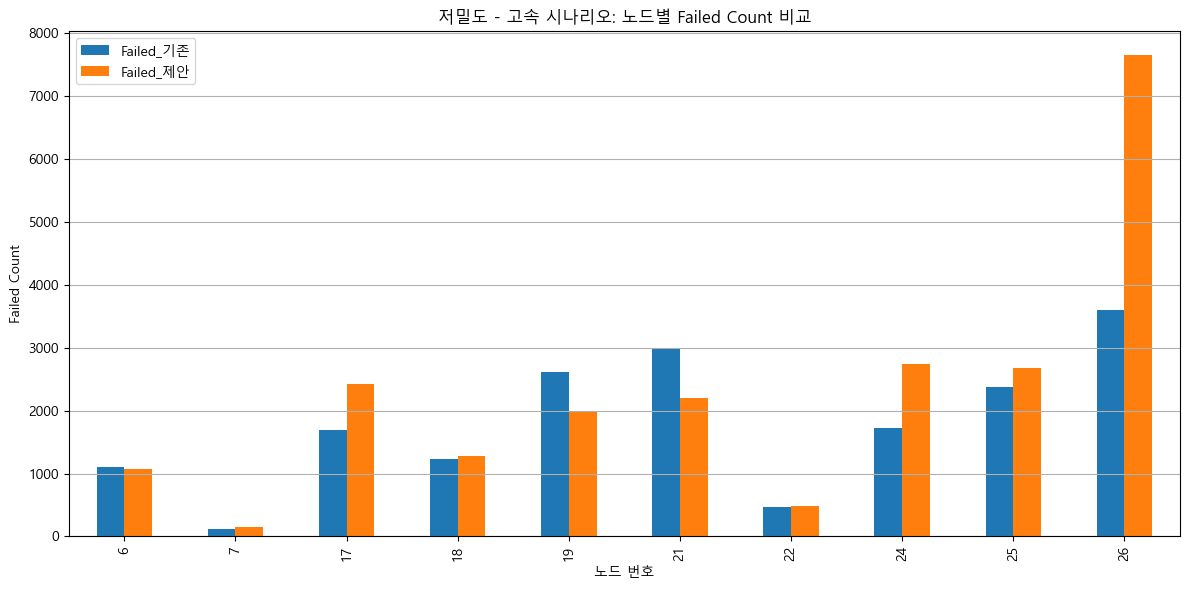

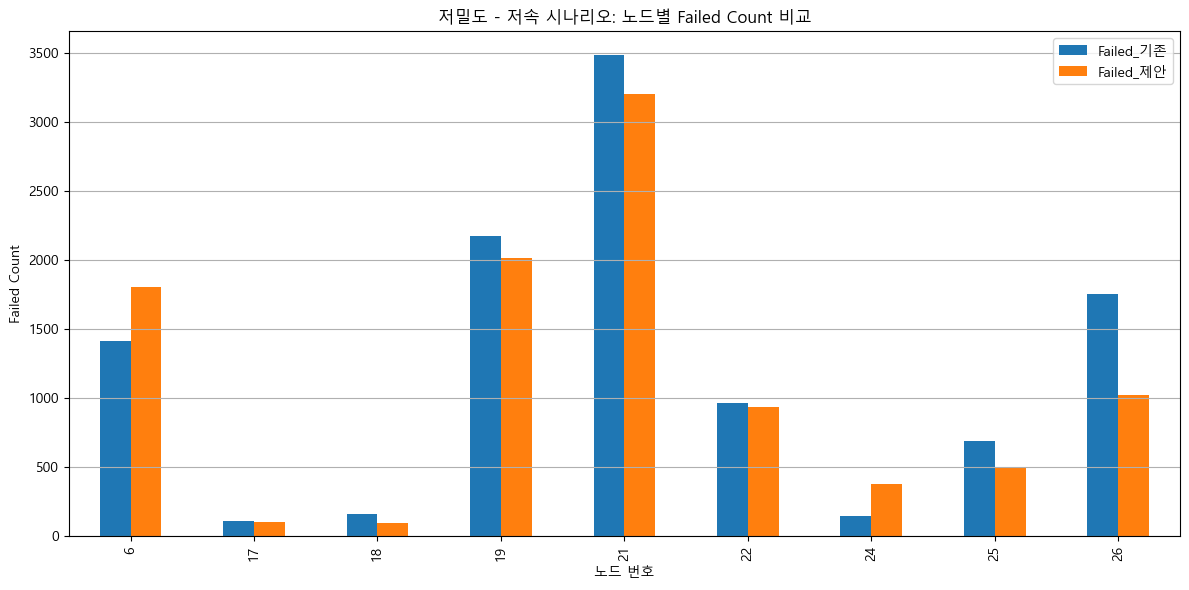

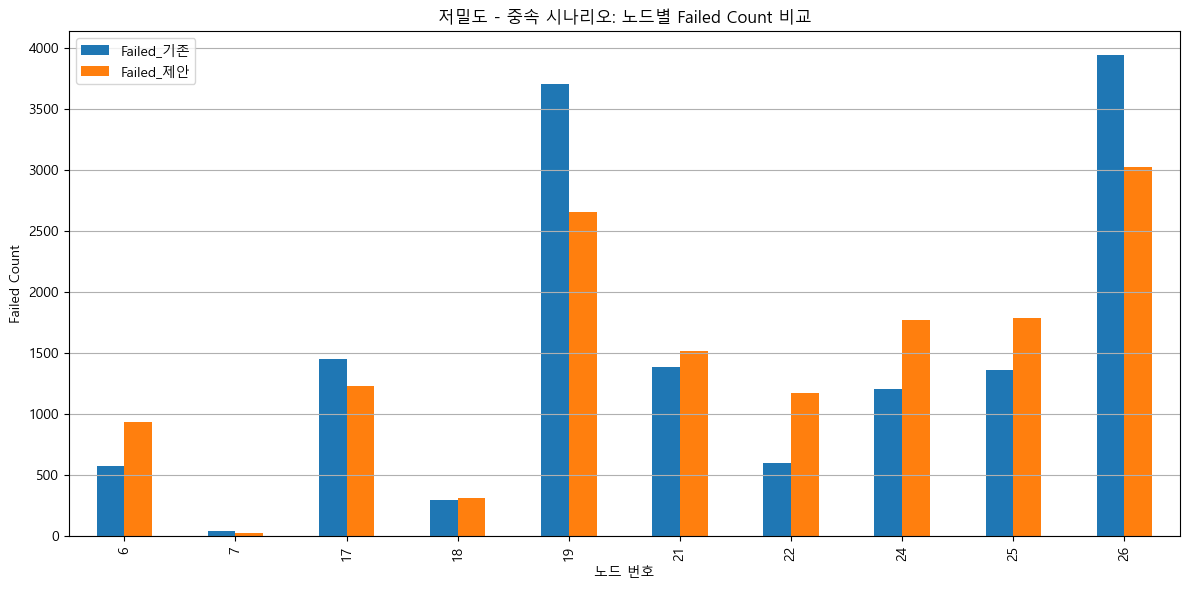

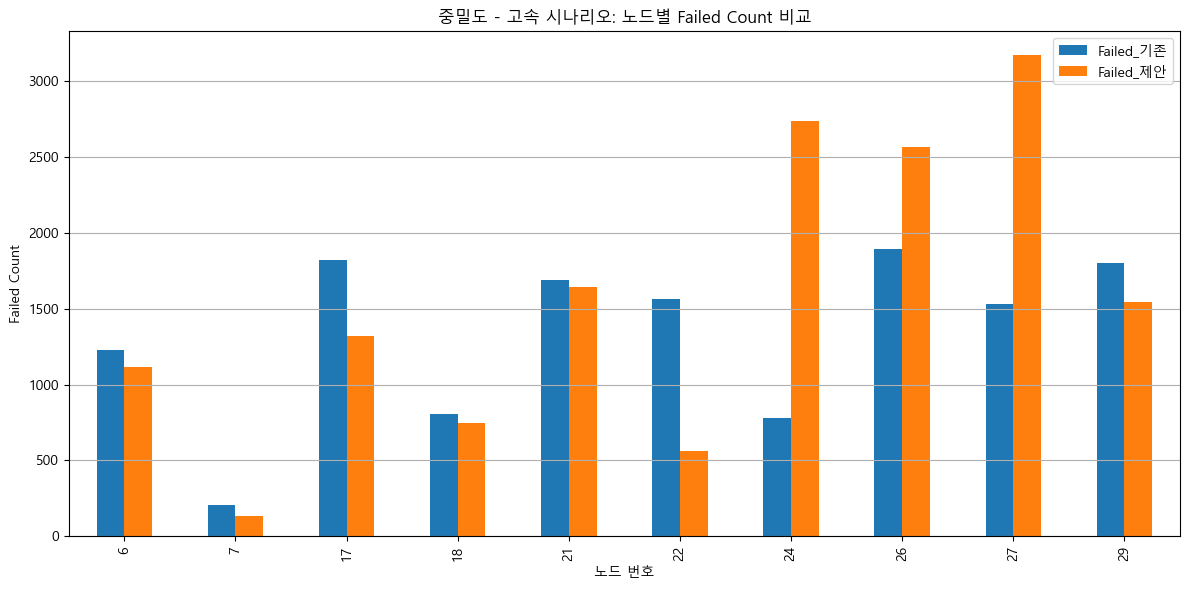

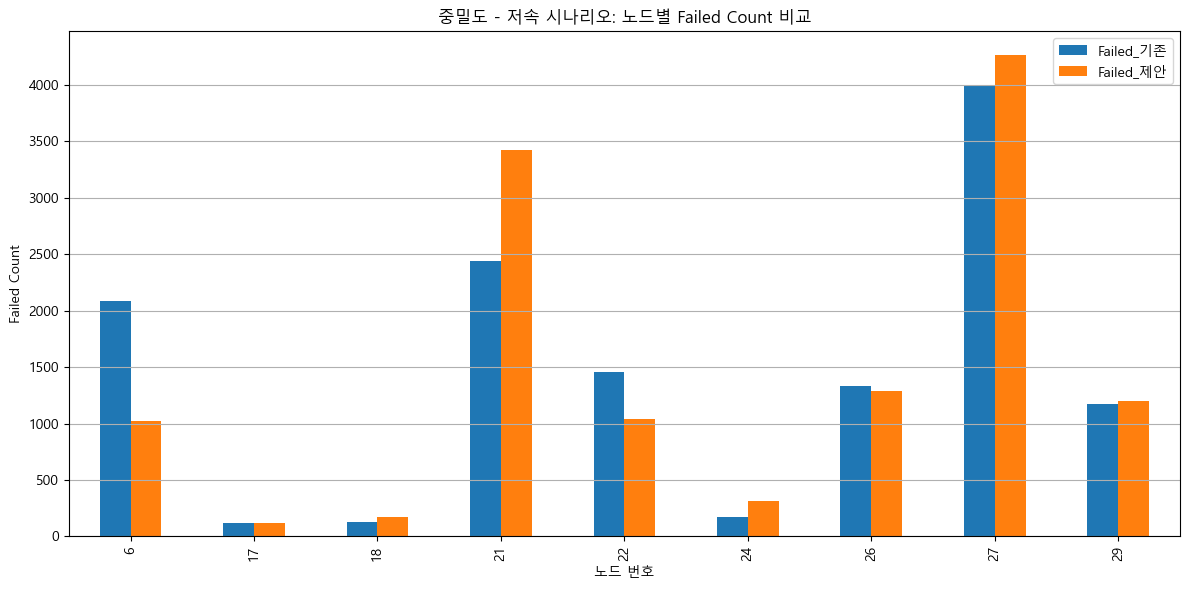

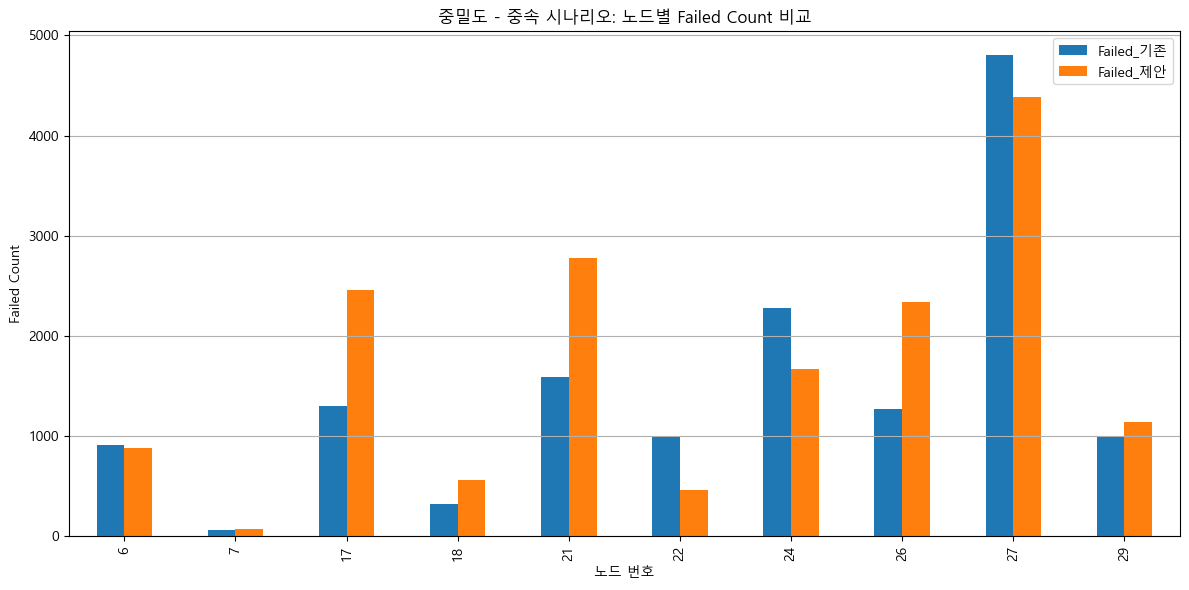

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("failure_analysis_comparison.csv", encoding="utf-8-sig")

# 시나리오별(밀도+속도)로 그룹화
scenarios = df.groupby(['Density', 'Speed'])

# 각 시나리오마다 그래프 출력
for (density, speed), group in scenarios:
    group_sorted = group.sort_values(by='Node')

    ax = group_sorted.plot(
        x='Node',
        y=['Failed_기존', 'Failed_제안'],
        kind='bar',
        figsize=(12, 6),
        title=f"{density} - {speed} 시나리오: 노드별 Failed Count 비교"
    )
    ax.set_xlabel("노드 번호")
    ax.set_ylabel("Failed Count")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


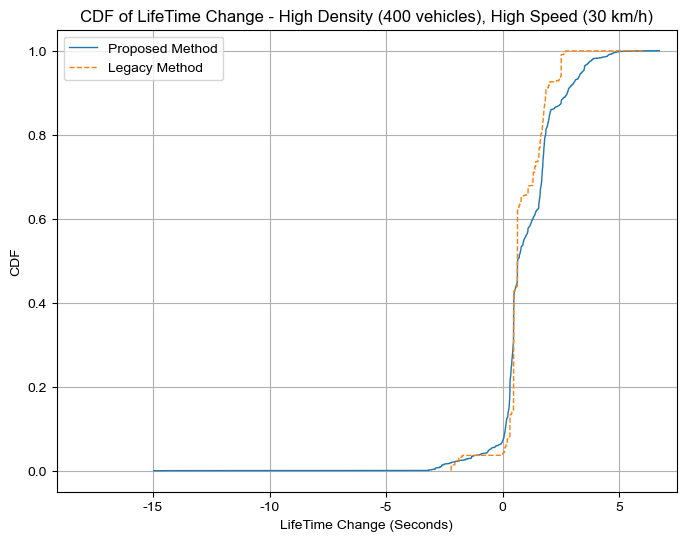

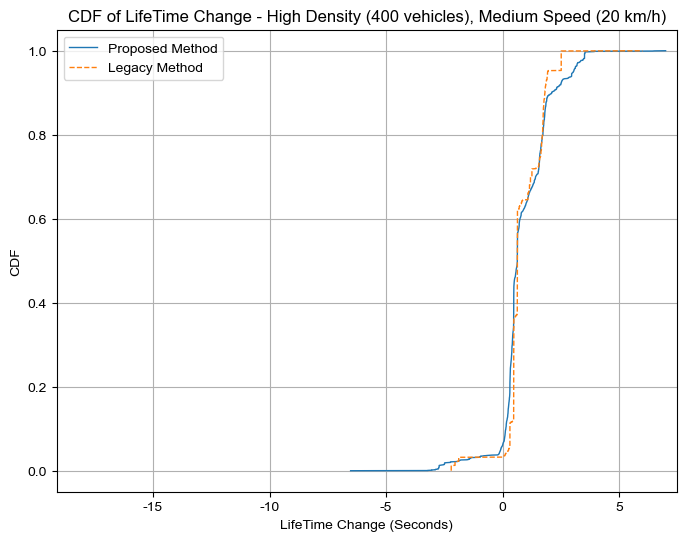

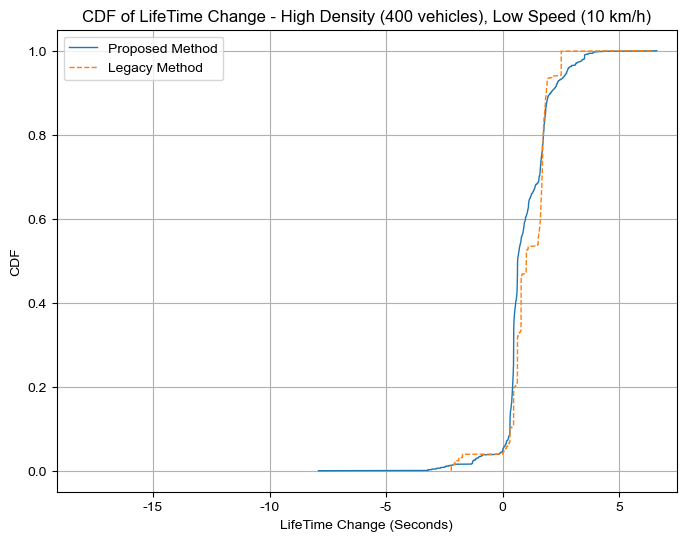

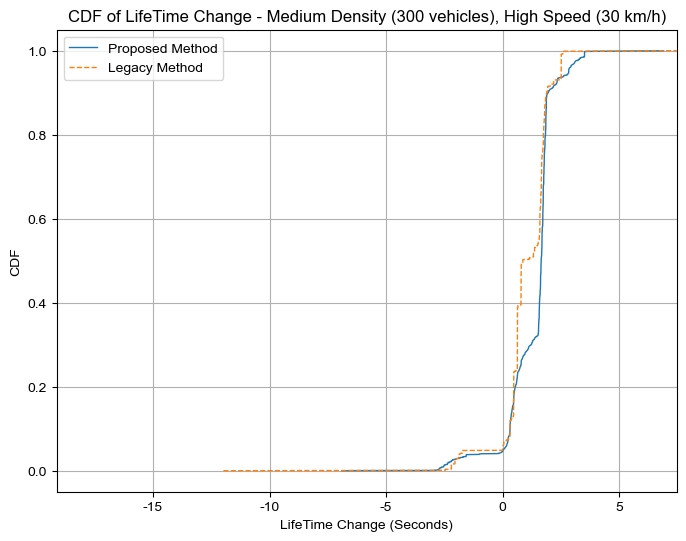

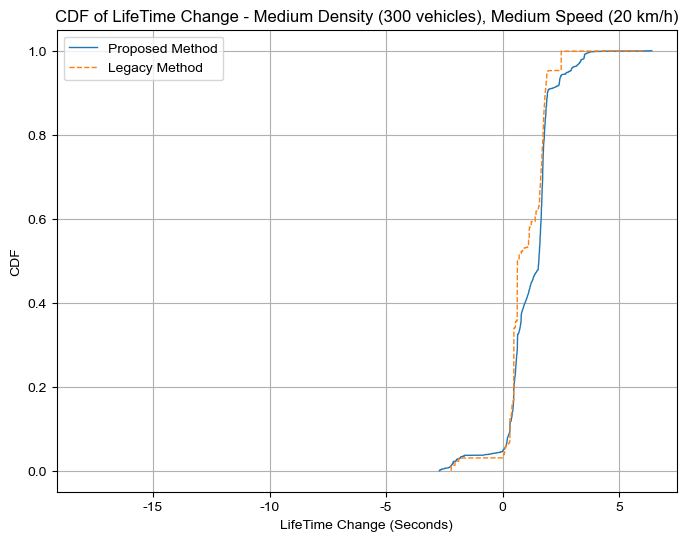

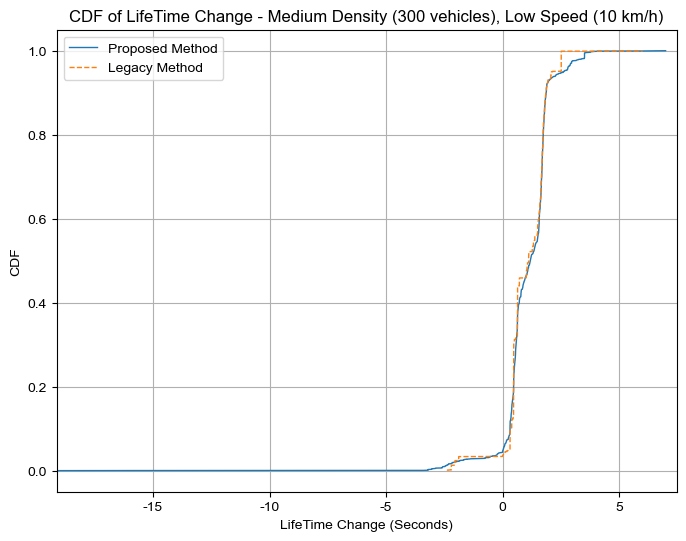

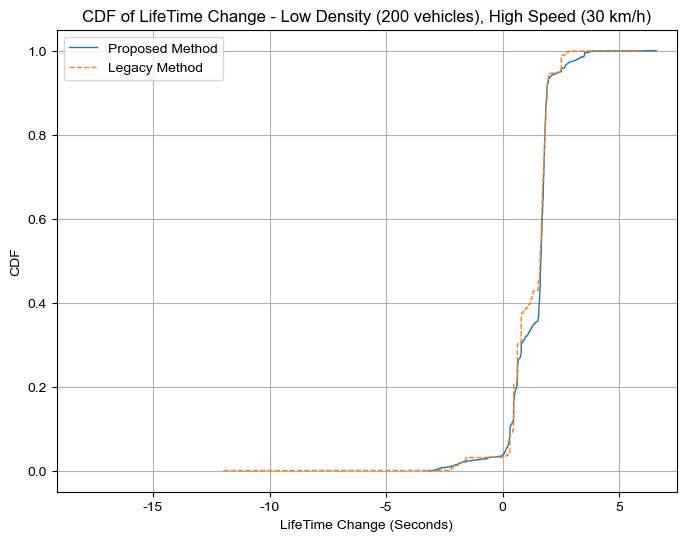

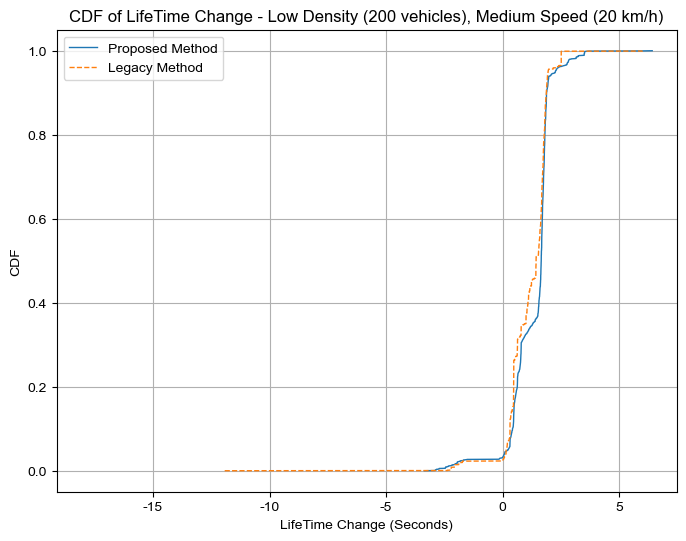

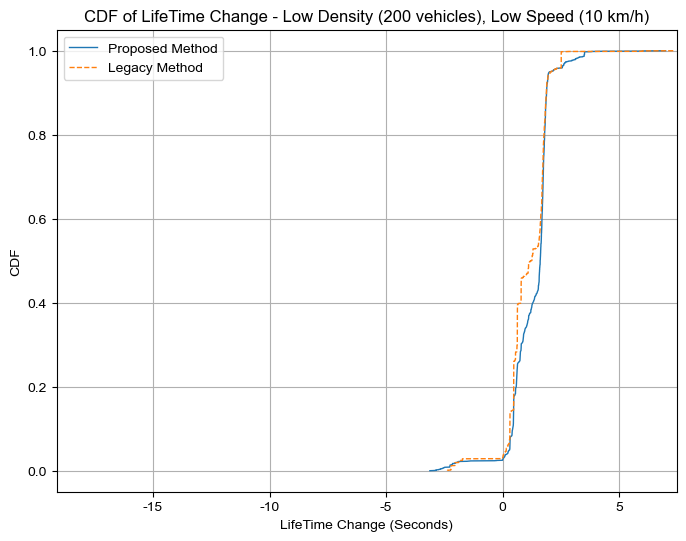

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

density_list = ["고밀도", "중밀도", "저밀도"]
speed_list = ["고속", "중속", "저속"]

min_value = df_result['LifeTime_Change'].min()
max_value = df_result['LifeTime_Change'].max()

for density in density_list:
    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]

        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            print(f"{density} - {speed}: Insufficient data to generate CDF")
            continue

        change_proposed = df_proposed['LifeTime_Change'].values
        change_legacy = df_legacy['LifeTime_Change'].values

        x_proposed, cdf_proposed = compute_cdf(change_proposed)
        x_legacy, cdf_legacy = compute_cdf(change_legacy)

        plt.figure(figsize=(8, 6))
        plt.plot(x_proposed, cdf_proposed, label="Proposed Method", linestyle='-', linewidth=1)
        plt.plot(x_legacy, cdf_legacy, label="Legacy Method", linestyle='--', linewidth=1)

        plt.xlabel("LifeTime Change (Seconds)")
        plt.ylabel("CDF")
        plt.xlim(min_value, max_value)

        density_english = density_translation.get(density, density)
        speed_english = speed_translation.get(speed, speed)
        plt.title(f"CDF of LifeTime Change - {density_english}, {speed_english}")

        plt.legend()
        plt.grid(True)
        plt.show()

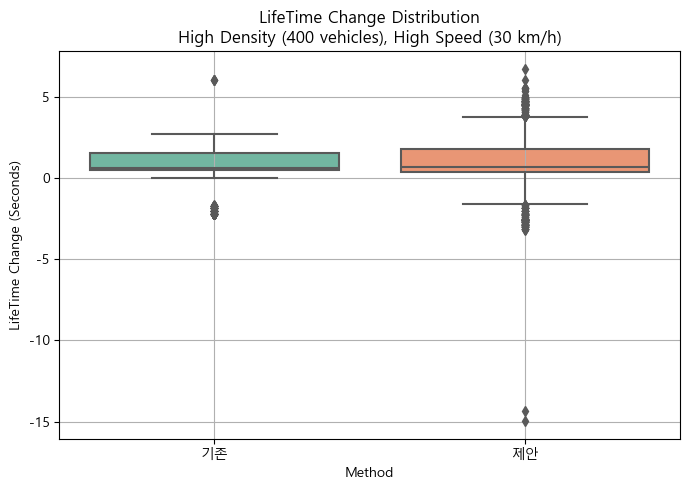

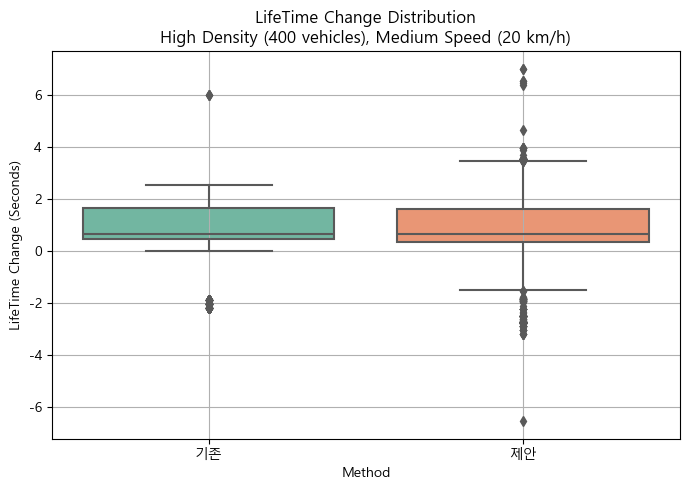

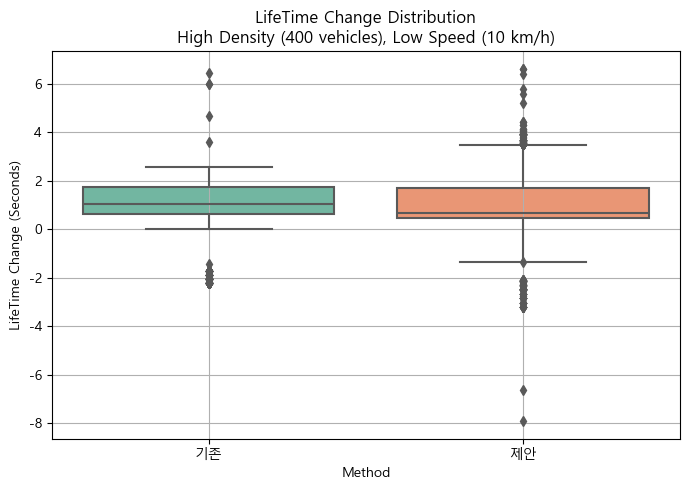

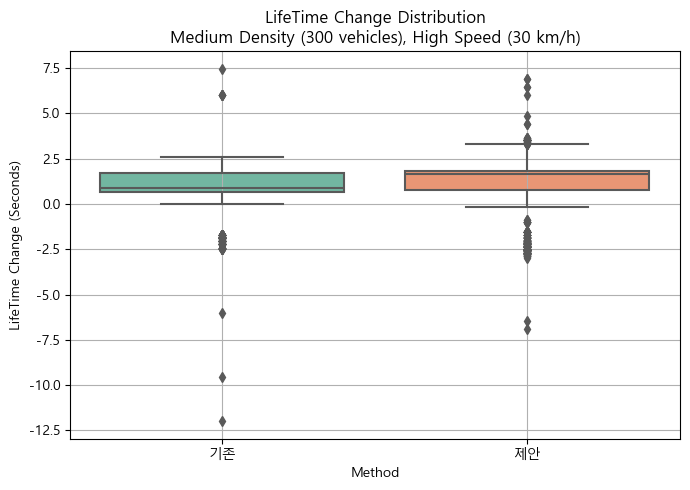

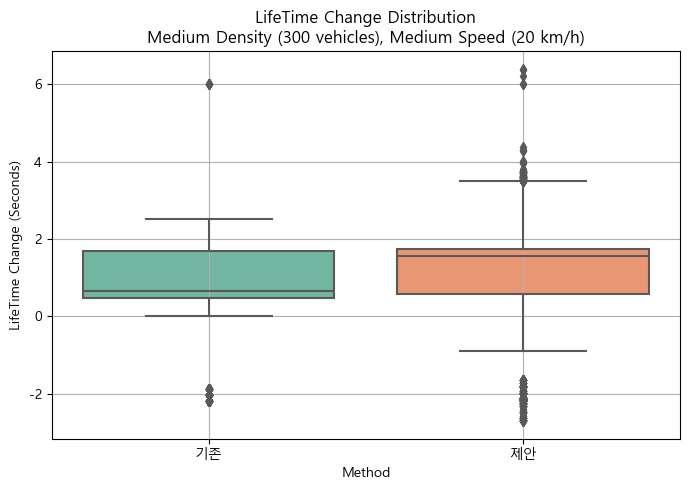

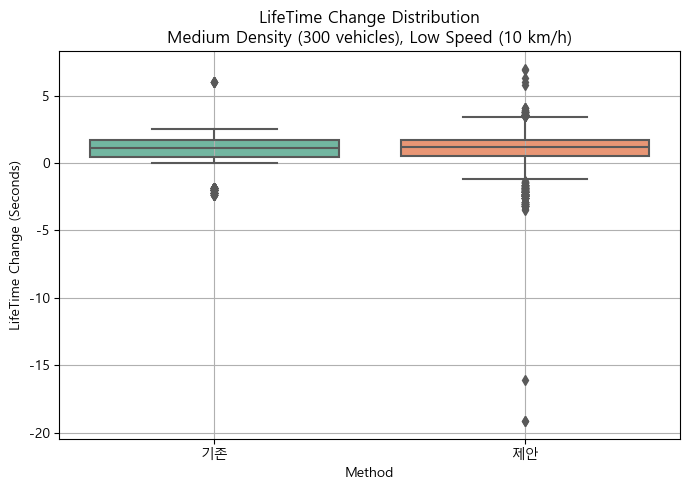

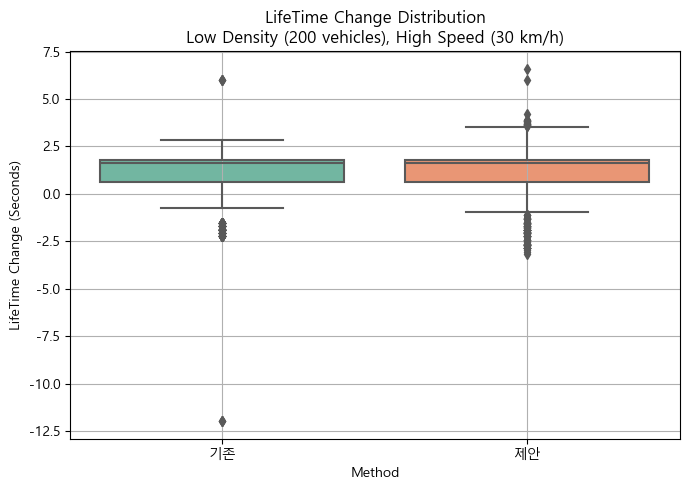

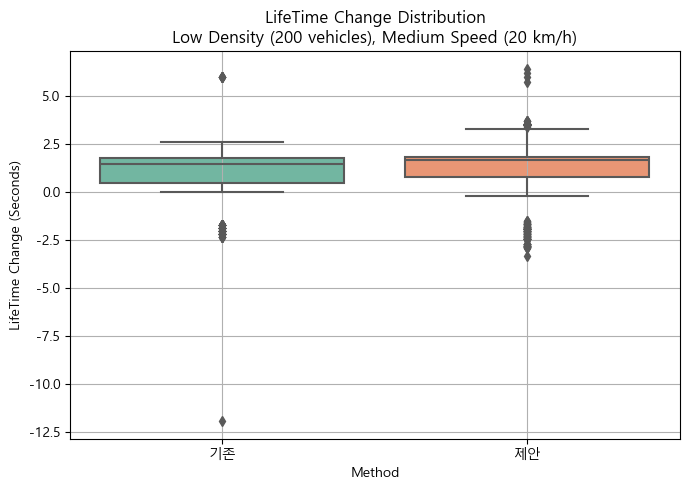

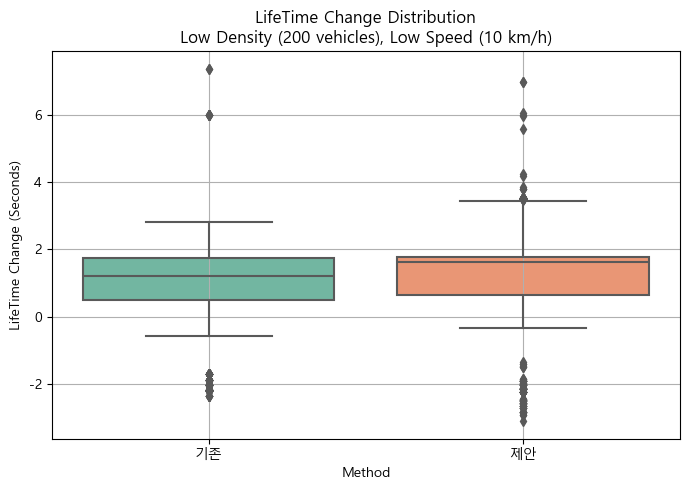

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

density_list = ["고밀도", "중밀도", "저밀도"]
speed_list = ["고속", "중속", "저속"]

for density in density_list:
    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]

        if df_filtered.empty:
            continue

        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df_filtered, x='Method', y='LifeTime_Change', palette='Set2')

        density_english = density_translation[density]
        speed_english = speed_translation[speed]

        plt.title(f"LifeTime Change Distribution\n{density_english}, {speed_english}")
        plt.xlabel("Method")
        plt.ylabel("LifeTime Change (Seconds)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


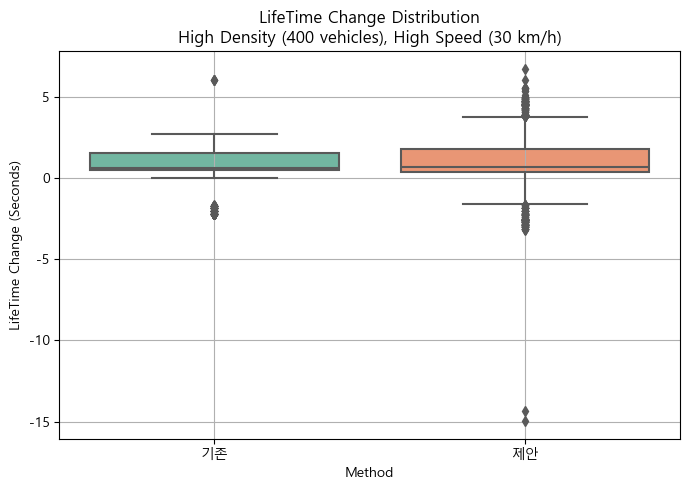

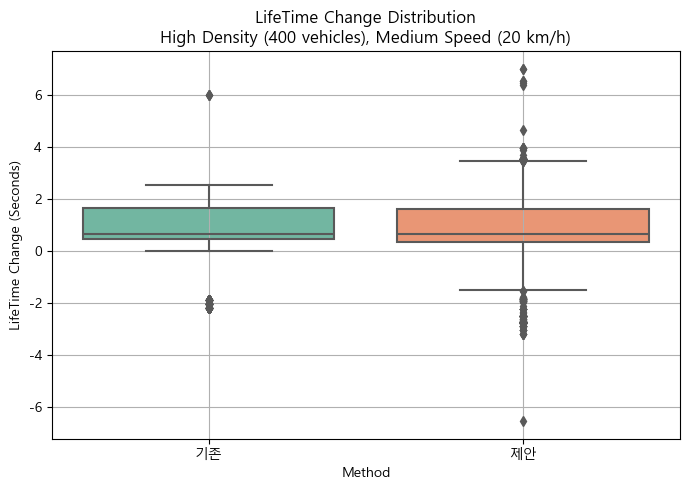

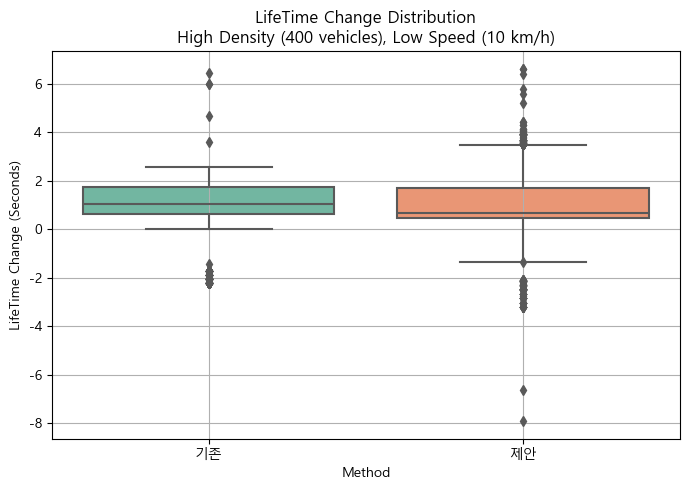

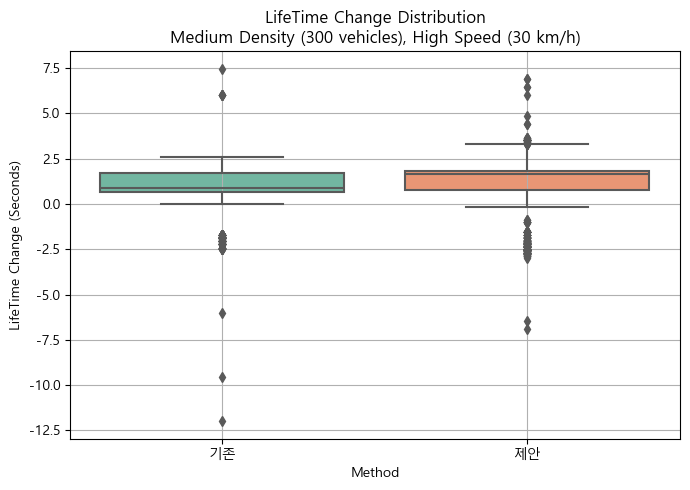

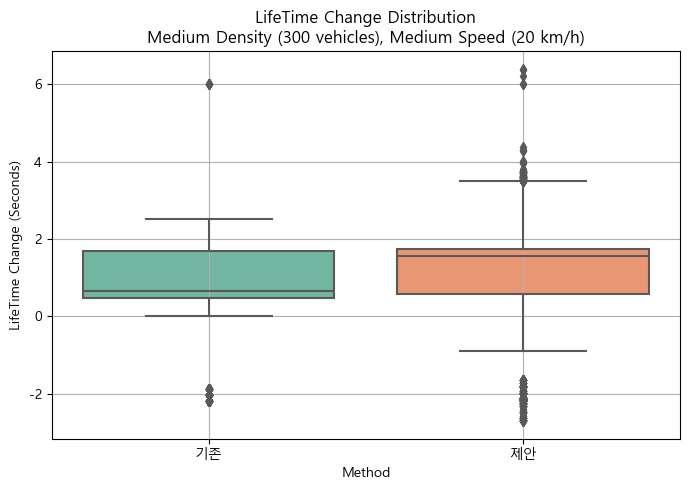

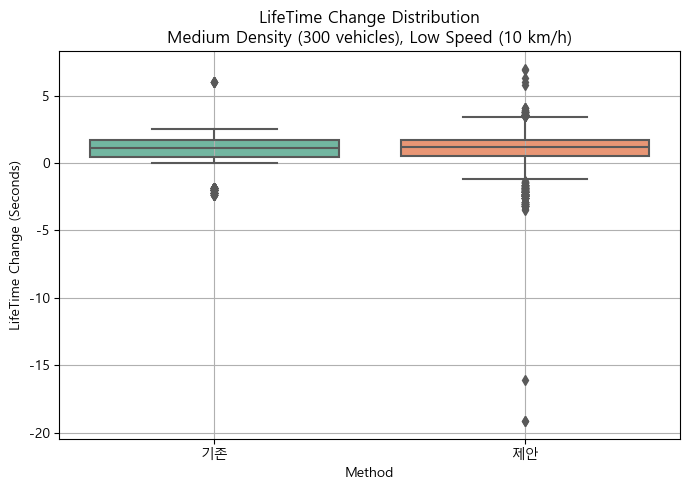

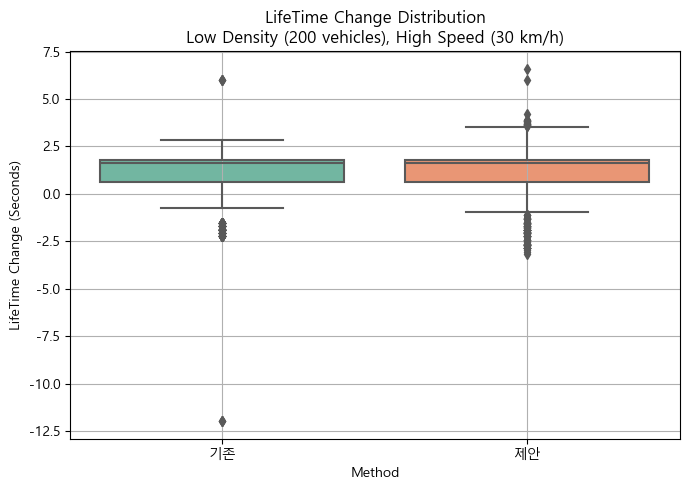

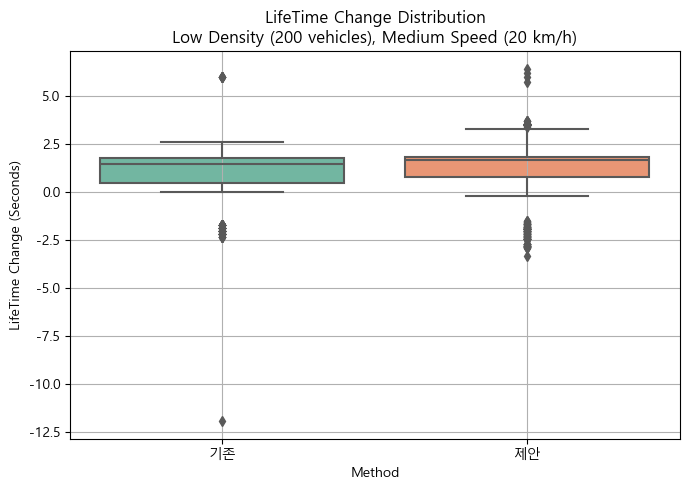

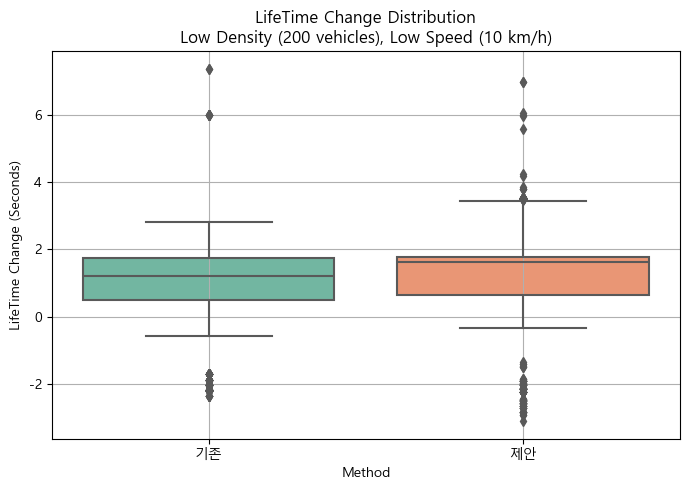

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

density_list = ["고밀도", "중밀도", "저밀도"]
speed_list = ["고속", "중속", "저속"]

for density in density_list:
    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]

        if df_filtered.empty:
            continue

        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df_filtered, x='Method', y='LifeTime_Change', palette="Set2")

        density_english = density_translation.get(density, density)
        speed_english = speed_translation.get(speed, speed)

        plt.title(f"LifeTime Change Distribution\n{density_english}, {speed_english}")
        plt.ylabel("LifeTime Change (Seconds)")
        plt.xlabel("Method")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


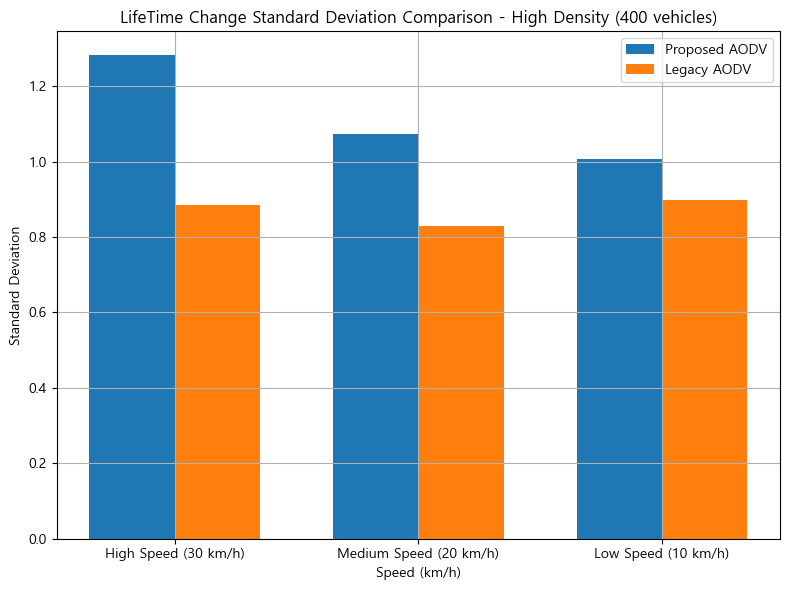

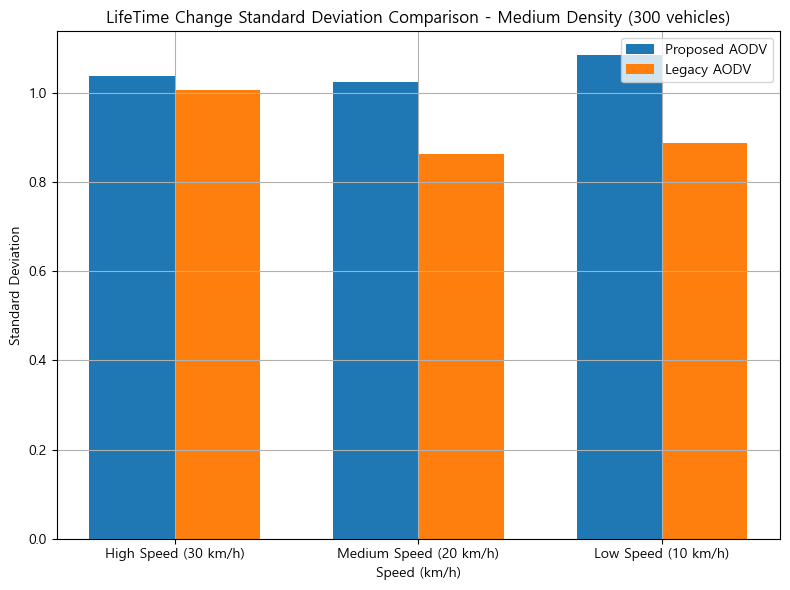

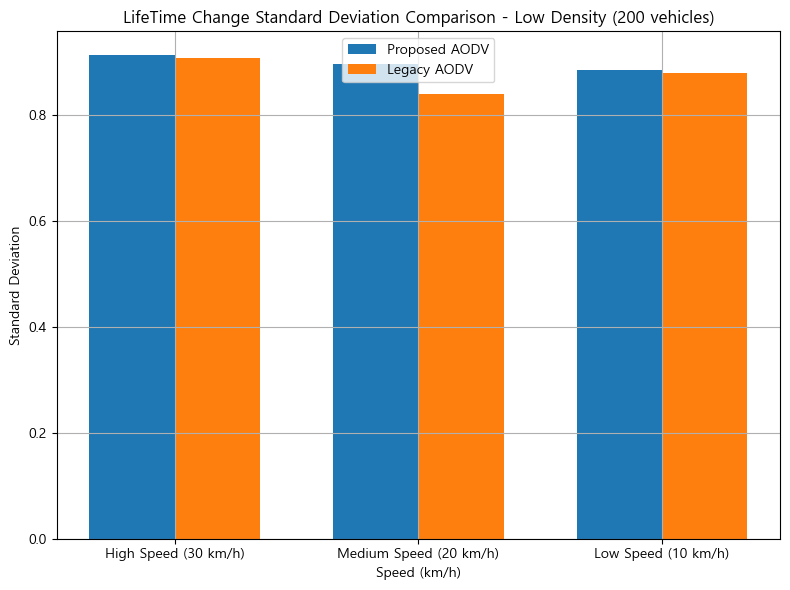

In [99]:
import matplotlib.pyplot as plt
import numpy as np

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

for density in density_list:
    labels = []
    proposed_std = []
    legacy_std = []

    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        proposed_std.append(df_proposed['LifeTime_Change'].std())
        legacy_std.append(df_legacy['LifeTime_Change'].std())

        labels.append(speed_translation.get(speed, speed))

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_std, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_std, width, label='Legacy AODV')

    plt.xlabel('Speed (km/h)')
    plt.ylabel('Standard Deviation')

    density_english = density_translation.get(density, "Unknown Density")
    plt.title(f'LifeTime Change Standard Deviation Comparison - {density_english}')

    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

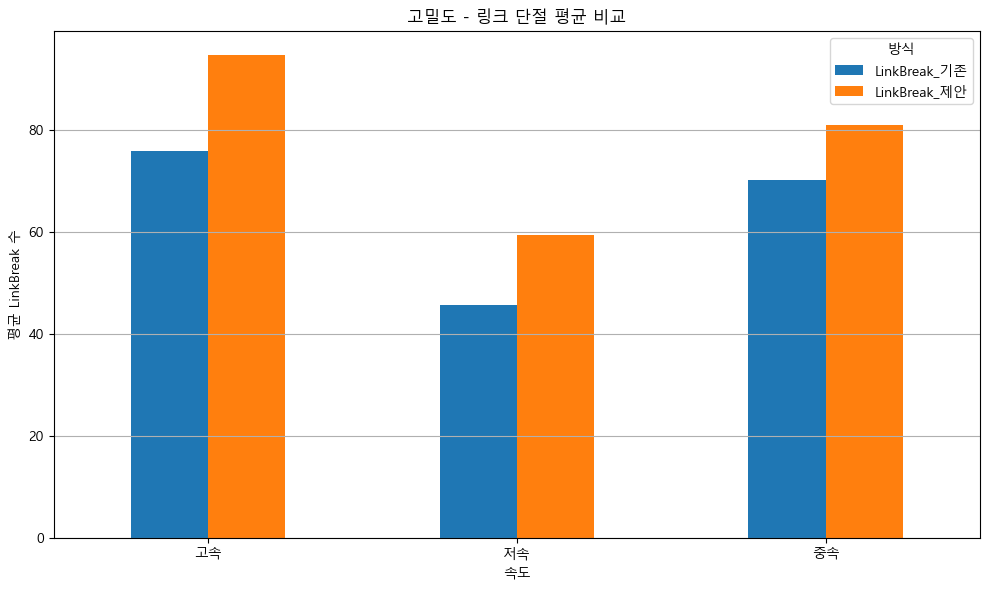

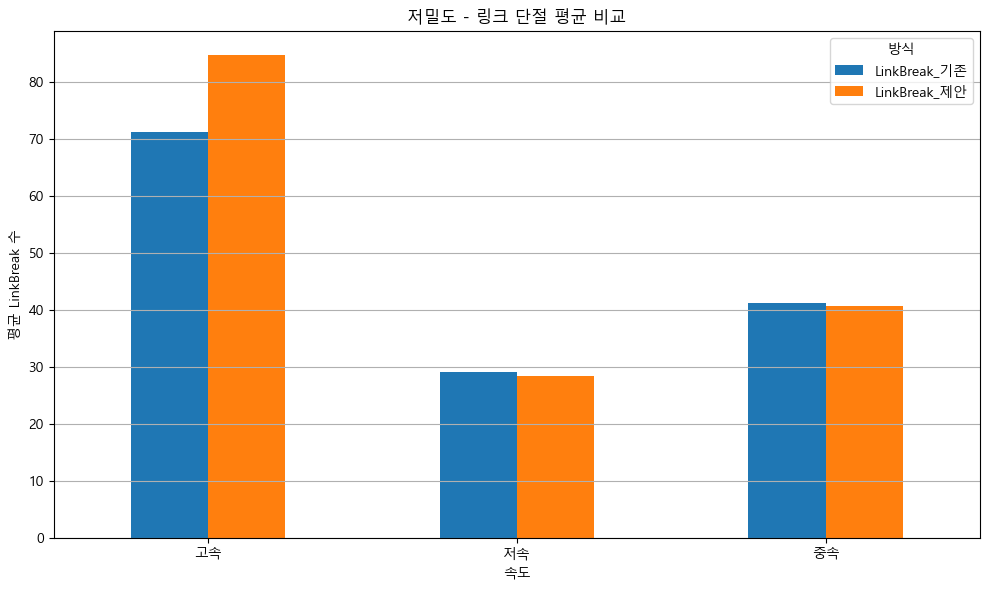

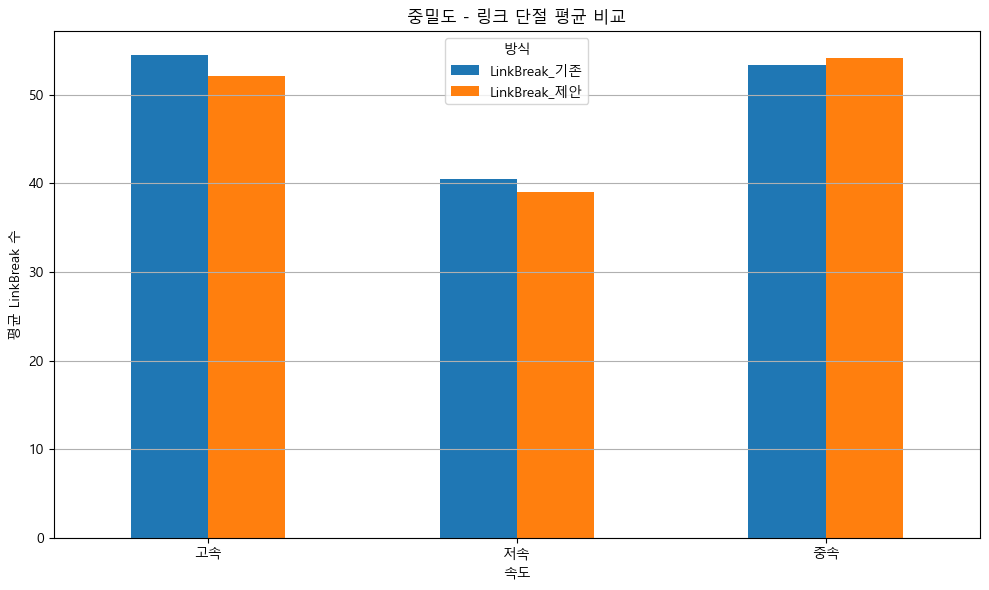

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 불러오기 (앞서 저장한 파일)
df = pd.read_csv("failure_analysis_comparison.csv", encoding="utf-8-sig")

# 밀도 및 속도 조합별 평균 계산
grouped = df.groupby(['Density', 'Speed'])[
    ['LinkBreak_기존', 'LinkBreak_제안']
].mean().reset_index()

# 시각화를 위해 데이터 피벗
plot_df = grouped.melt(id_vars=['Density', 'Speed'], 
                       value_vars=['LinkBreak_기존', 'LinkBreak_제안'],
                       var_name='방식', value_name='LinkBreak 평균')

# 그래프 생성
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for density in plot_df['Density'].unique():
    subset = plot_df[plot_df['Density'] == density]
    ax = subset.pivot(index='Speed', columns='방식', values='LinkBreak 평균').plot(
        kind='bar', title=f"{density} - 링크 단절 평균 비교", figsize=(10, 6)
    )
    ax.set_ylabel("평균 LinkBreak 수")
    ax.set_xlabel("속도")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


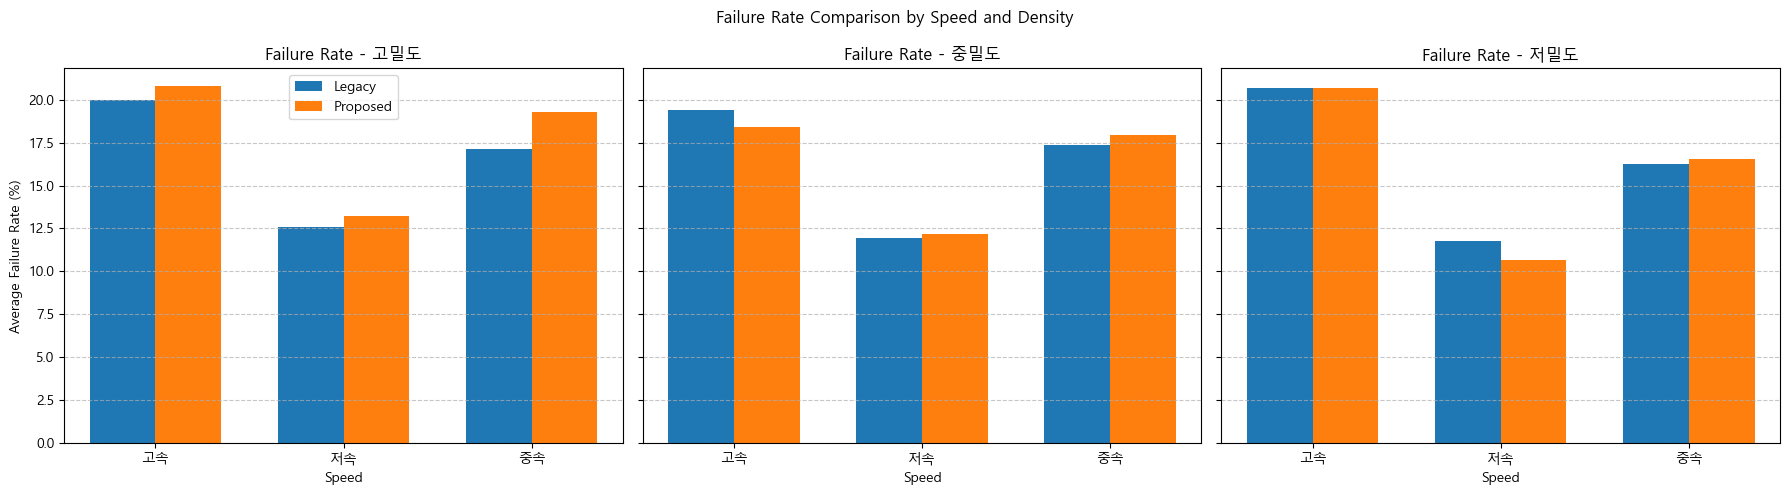

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
df = pd.read_csv("failure_analysis_comparison.csv")

# 환경 이름 생성 (Speed만 사용)
df['Speed_Label'] = df['Speed']

# Density 리스트
densities = df['Density'].unique()

# 그래프 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, density in enumerate(densities):
    subset = df[df['Density'] == density]
    grouped = subset.groupby('Speed_Label')[['FailureRate_기존', 'FailureRate_제안']].mean().reset_index()
    
    x = range(len(grouped))
    width = 0.35

    axes[i].bar([j - width/2 for j in x], grouped['FailureRate_기존'], width=width, label='Legacy')
    axes[i].bar([j + width/2 for j in x], grouped['FailureRate_제안'], width=width, label='Proposed')

    axes[i].set_title(f"Failure Rate - {density}")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(grouped['Speed_Label'])
    axes[i].set_xlabel("Speed")
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

axes[0].set_ylabel("Average Failure Rate (%)")
axes[0].legend()
plt.suptitle("Failure Rate Comparison by Speed and Density")
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("failure_analysis_comparison.csv")

# Success 계산
df['Success_기존'] = df['Transmit_기존'] - df['Failed_기존']
df['Success_제안'] = df['Transmit_제안'] - df['Failed_제안']

# Success Rate 계산
df['SuccessRate_기존'] = df['Success_기존'] / df['Transmit_기존'] * 100
df['SuccessRate_제안'] = df['Success_제안'] / df['Transmit_제안'] * 100

# 환경 정보 추가
df['환경'] = df['Density'] + " | " + df['Speed']

# 환경별 평균 집계
grouped = df.groupby('환경')[[
    'Transmit_기존', 'Success_기존', 'SuccessRate_기존',
    'Transmit_제안', 'Success_제안', 'SuccessRate_제안'
]].mean().reset_index()

# 결과 출력
print(grouped)


         환경  Transmit_기존  Success_기존  SuccessRate_기존  Transmit_제안  Success_제안  \
0  고밀도 | 고속       8584.4      6662.4       80.046078       9576.6      7376.2   
1  고밀도 | 저속       9778.7      7927.5       87.421227      10570.0      8367.5   
2  고밀도 | 중속       9501.1      7473.1       82.899687      10502.0      8118.2   
3  저밀도 | 고속       7684.1      5892.4       79.299283       9347.5      7081.6   
4  저밀도 | 저속       7096.3      6000.7       88.255973       7160.3      6148.5   
5  저밀도 | 중속       7386.5      5927.6       83.724141       7626.1      6180.9   
6  중밀도 | 고속       6531.6      5200.5       80.609626       7507.1      5954.2   
7  중밀도 | 저속       8157.3      6864.2       88.042084       7779.6      6491.7   
8  중밀도 | 중속       7127.1      5670.6       82.638579       7946.1      6269.9   

   SuccessRate_제안  
0       79.216443  
1       86.744477  
2       80.693794  
3       79.343258  
4       89.321571  
5       83.428781  
6       81.578282  
7       87.799389  
8       8

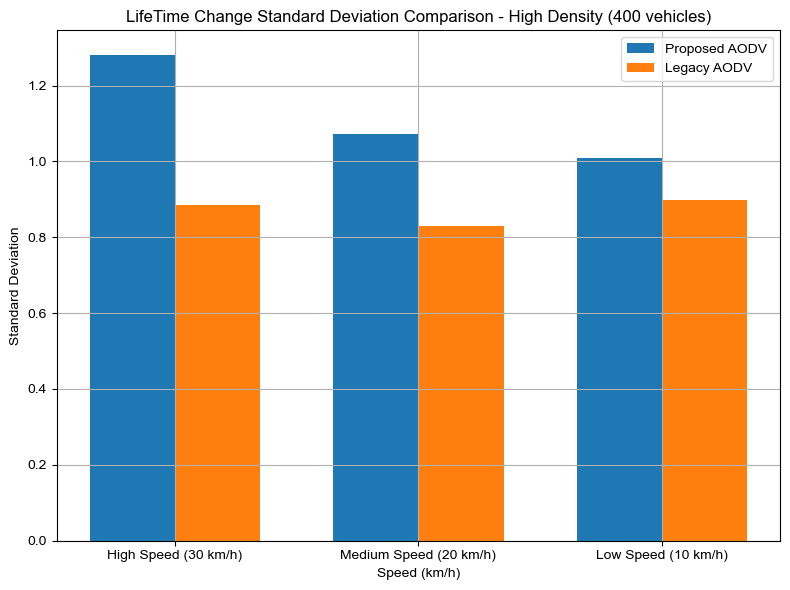

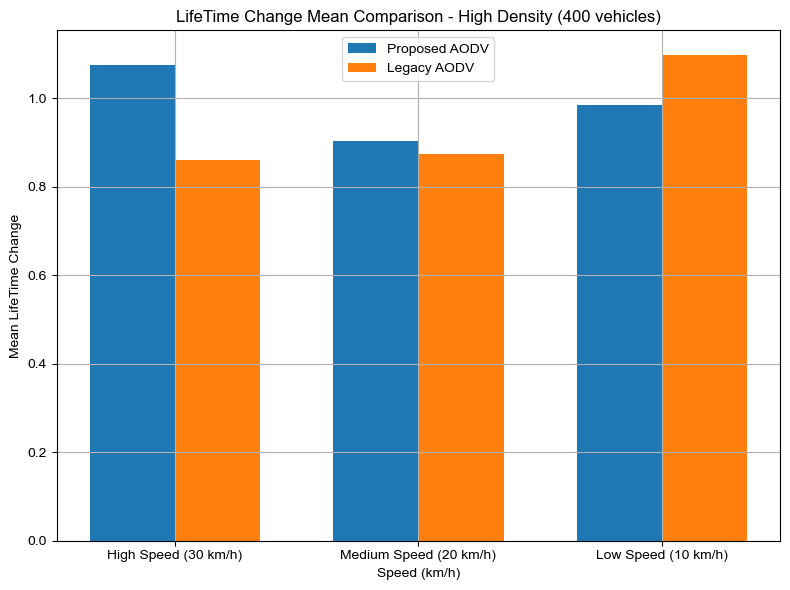

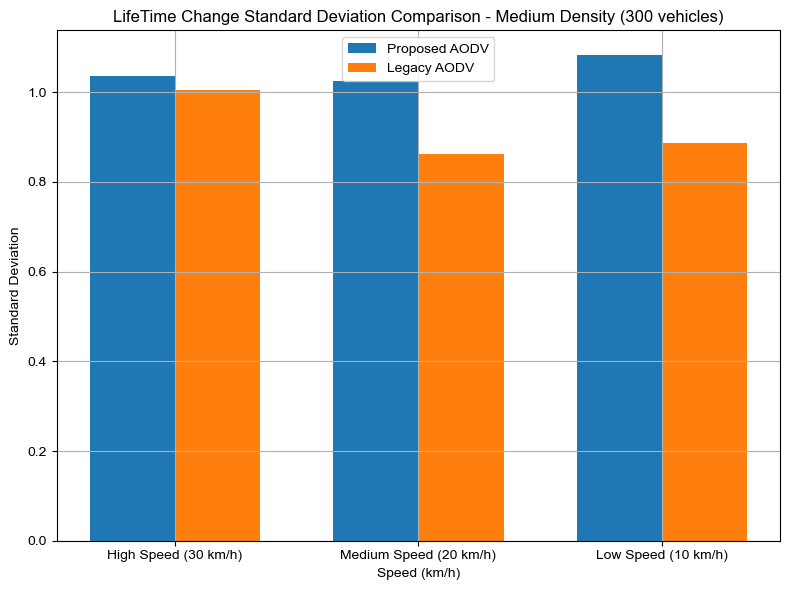

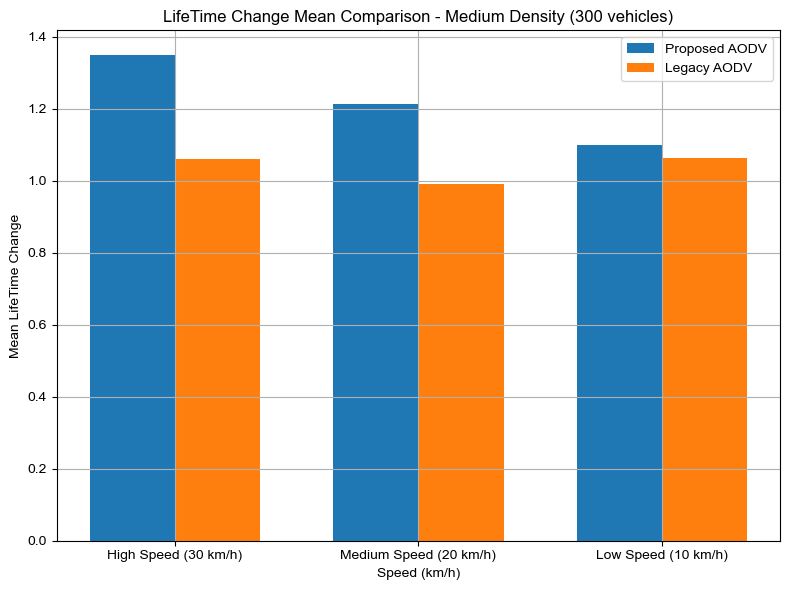

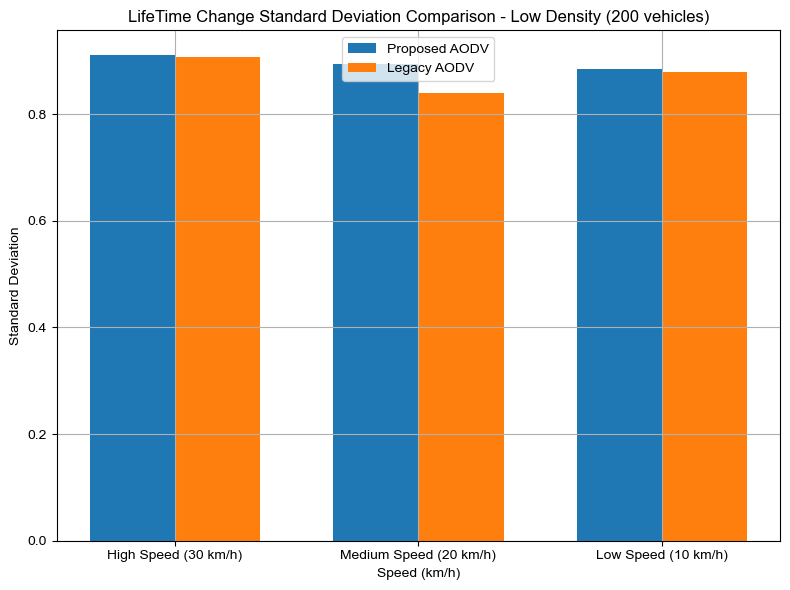

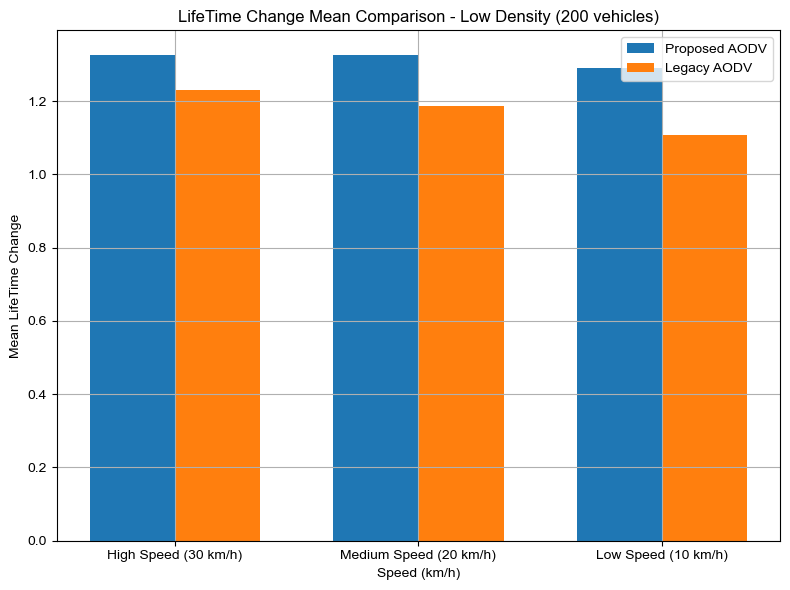

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

density_translation = {
    "고밀도": "High Density (400 vehicles)",
    "중밀도": "Medium Density (300 vehicles)",
    "저밀도": "Low Density (200 vehicles)"
}

speed_translation = {
    "고속": "High Speed (30 km/h)",
    "중속": "Medium Speed (20 km/h)",
    "저속": "Low Speed (10 km/h)"
}

for density in density_list:
    labels = []
    proposed_std = []
    legacy_std = []
    proposed_mean = []
    legacy_mean = []

    for speed in speed_list:
        df_filtered = df_result[(df_result['Density'] == density) & (df_result['Speed'] == speed)]
        df_proposed = df_filtered[df_filtered['Method'] == '제안']
        df_legacy = df_filtered[df_filtered['Method'] == '기존']

        if df_proposed.empty or df_legacy.empty:
            continue

        proposed_std.append(df_proposed['LifeTime_Change'].std())
        legacy_std.append(df_legacy['LifeTime_Change'].std())

        proposed_mean.append(df_proposed['LifeTime_Change'].mean())
        legacy_mean.append(df_legacy['LifeTime_Change'].mean())

        labels.append(speed_translation.get(speed, speed))

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_std, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_std, width, label='Legacy AODV')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Standard Deviation')
    density_english = density_translation.get(density, "Unknown Density")
    plt.title(f'LifeTime Change Standard Deviation Comparison - {density_english}')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, proposed_mean, width, label='Proposed AODV')
    plt.bar(x + width/2, legacy_mean, width, label='Legacy AODV')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Mean LifeTime Change')
    plt.title(f'LifeTime Change Mean Comparison - {density_english}')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
